# Problem Statement
- A student depression dataset typically contains data aimed at analyzing, understanding, and predicting depression levels among students. It may include features such as demographic information (age, gender), academic performance (grades, attendance), lifestyle habits (sleep patterns, exercise, social activities), mental health history, and responses to standardized depression scales.

- These datasets are valuable for research in psychology, data science, and education to identify factors contributing to student depression and to design early intervention strategies. Ethical considerations like privacy, informed consent, and anonymization of data are crucial in working with such sensitive information.

In [86]:
## libraries.

import numpy as np  # linear algebra
import pandas as pd  # data processing 
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # advanced visuals
import warnings as w  # ignoring warnings

from scipy.stats import zscore  # for outliers
from scipy.stats import f_oneway  # categorical test
from scipy.stats import ttest_ind  # numerical test

from imblearn.combine import SMOTEENN  # resampling

from sklearn.preprocessing import LabelEncoder  # feature encoding
from sklearn.model_selection import train_test_split  # train, test, split
from sklearn.preprocessing import StandardScaler  # scale the data
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # model & features importance
from sklearn.linear_model import LogisticRegression  # model
from sklearn.feature_selection import mutual_info_classif  # feature importance
from sklearn.tree import DecisionTreeClassifier  # model
from sklearn.svm import SVC  # model
from sklearn.neighbors import KNeighborsClassifier  # model
from sklearn.naive_bayes import GaussianNB  # model
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, classification_report  # classification metrics
from sklearn.model_selection import cross_val_score  # cross validation
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from lightgbm import LGBMClassifier  # model
from xgboost import XGBClassifier  # model

from sklearn import set_config  # setting
import joblib as jb  # deployment

In [87]:
## os.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [88]:
## settings.

sns.set()
w.filterwarnings('ignore')
%matplotlib inline
sns.set_style('ticks')
pd.set_option('display.max_columns', None)
set_config(display = 'diagram')

# Importing Dataset

In [89]:
## read data.

data = pd.read_csv(r'C:\Users\KIIT\Desktop\depression data\Student Depression Dataset.csv')

# Understanding The Data

In [90]:
## top 5.

data.head()

id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

In [91]:
## bottom 5.

data.tail()

id  Gender   Age       City Profession  Academic Pressure  \
27896  140685  Female  27.0      Surat    Student                5.0   
27897  140686    Male  27.0   Ludhiana    Student                2.0   
27898  140689    Male  31.0  Faridabad    Student                3.0   
27899  140690  Female  18.0   Ludhiana    Student                5.0   
27900  140699    Male  27.0      Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
27896            0.0  5.75                 5.0               0.0   
27897            0.0  9.40                 3.0               0.0   
27898            0.0  6.61                 4.0               0.0   
27899            0.0  6.88                 2.0               0.0   
27900            0.0  9.24                 1.0               0.0   

          Sleep Duration Dietary Habits    Degree  \
27896          5-6 hours      Unhealthy  Class 12   
27897  Less than 5 hours        Healthy       MSc   
27898          5-6 hours      Unhealthy        MD   
27899  Less than 5 hours        Healthy  Class 12   
27900  Less than 5 hours        Healthy       BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

       Financial Stress Family History of Mental Illness  Depression  
27896               1.0                              Yes           0  
27897               3.0                              Yes           0  
27898               2.0                               No           0  
27899               5.0                               No           1  
27900               3.0                              Yes           1

In [92]:
## shape.

data.shape

(27901, 18)

In [93]:
## columns

data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [94]:
## basic information.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [95]:
## describtion of data.

data.describe().round(3)

id        Age  Academic Pressure  Work Pressure       CGPA  \
count   27901.000  27901.000          27901.000      27901.000  27901.000   
mean    70442.149     25.822              3.141          0.000      7.656   
std     40641.175      4.906              1.381          0.044      1.471   
min         2.000     18.000              0.000          0.000      0.000   
25%     35039.000     21.000              2.000          0.000      6.290   
50%     70684.000     25.000              3.000          0.000      7.770   
75%    105818.000     30.000              4.000          0.000      8.920   
max    140699.000     59.000              5.000          5.000     10.000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count           27901.000         27901.000         27901.000   
mean                2.944             0.001             7.157   
std                 1.361             0.044             3.708   
min                 0.000             0.000             0.000   
25%                 2.000             0.000             4.000   
50%                 3.000             0.000             8.000   
75%                 4.000             0.000            10.000   
max                 5.000             4.000            12.000   

       Financial Stress  Depression  
count         27898.000   27901.000  
mean              3.140       0.585  
std               1.437       0.493  
min               1.000       0.000  
25%               2.000       0.000  
50%               3.000       1.000  
75%               4.000       1.000  
max               5.000       1.000

In [96]:
## object describtion.

data.describe(include = 'object').round(3)

Gender    City Profession     Sleep Duration Dietary Habits    Degree  \
count   27901   27901      27901              27901          27901     27901   
unique      2      52         14                  5              4        28   
top      Male  Kalyan    Student  Less than 5 hours      Unhealthy  Class 12   
freq    15547    1570      27870               8310          10317      6080   

       Have you ever had suicidal thoughts ? Family History of Mental Illness  
count                                  27901                            27901  
unique                                     2                                2  
top                                      Yes                               No  
freq                                   17656                            14398

In [97]:
## target variable..

data['Depression'].value_counts(normalize = True).round(3).to_frame()

proportion
Depression            
1                0.585
0                0.415

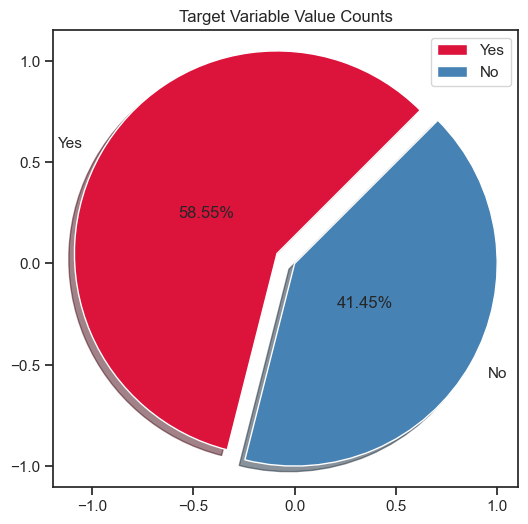

In [98]:
## plot.

plt.figure(figsize = (6, 6))
plt.pie(x = data['Depression'].value_counts(),\
        labels = ['Yes', 'No'],\
        shadow = True,\
        colors = ['crimson', 'steelblue'],\
        autopct = '%0.2f%%',\
        startangle = 45,\
        explode = [0.1, 0],\
        frame = True,\
        pctdistance = 0.4)
plt.title('Target Variable Value Counts')
plt.legend()
plt.show()

In [99]:
## data types.

data.dtypes.to_frame().reset_index().rename(columns = {'index': 'features', 0: 'data_types'})

features data_types
0                                      id      int64
1                                  Gender     object
2                                     Age    float64
3                                    City     object
4                              Profession     object
5                       Academic Pressure    float64
6                           Work Pressure    float64
7                                    CGPA    float64
8                      Study Satisfaction    float64
9                        Job Satisfaction    float64
10                         Sleep Duration     object
11                         Dietary Habits     object
12                                 Degree     object
13  Have you ever had suicidal thoughts ?     object
14                       Work/Study Hours    float64
15                       Financial Stress    float64
16       Family History of Mental Illness     object
17                             Depression      int64

# Data Cleaning & Preprocessing

In [100]:
## drop irrelavent columns.

data.drop(['id', 'Job Satisfaction', 'Work Pressure'], axis = 1, inplace = True)
data.shape

(27901, 15)

In [101]:
## duplicates.

data.duplicated().sum()

0

In [102]:
## null values.

null_col = data.isna().sum() / data.shape[0] * 100
null_col[null_col > 0].to_frame().rename(columns = {0: 'null_values'})

null_values
Financial Stress     0.010752

In [103]:
## drop null values.

data.dropna(inplace = True)
data.shape

(27898, 15)

In [104]:
## columns names.

data.columns = data.columns.str.title()
data.columns = data.columns.str.replace(' ', '_')
data.rename(columns = {'Have_You_Ever_Had_Suicidal_Thoughts_?': 'Suicidal_Thoughts',\
                       'Family_History_Of_Mental_Illness': 'Family_Mental_History',\
                       'Work/Study_Hours': 'WrkStdy_Hours'}, inplace = True)
data.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic_Pressure', 'Cgpa',
       'Study_Satisfaction', 'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Suicidal_Thoughts', 'WrkStdy_Hours', 'Financial_Stress',
       'Family_Mental_History', 'Depression'],
      dtype='object')

In [105]:
## converting columns float into int.

convert_columns = ['Age', 'Academic_Pressure',\
                   'Study_Satisfaction', 'WrkStdy_Hours', 'Financial_Stress']

for i in convert_columns:
    data[i] = data[i].astype('int64')

In [106]:
## city.

filtered_city = data[data['City'].map(data['City'].value_counts()) <= 2]

data.drop(index = filtered_city.index, inplace = True)
data.shape

(27872, 15)

In [107]:
## cgpa.

data['Cgpa'] = data['Cgpa'].round(2)
data['Cgpa'].value_counts().head(10)

Cgpa
8.04    821
9.96    425
5.74    410
8.95    370
9.21    342
7.25    339
7.09    320
7.88    318
9.44    316
8.91    275
Name: count, dtype: int64

In [108]:
## study satisfaction.

data = data.query("Study_Satisfaction != 0").reset_index(drop = True)
data.shape

(27862, 15)

In [109]:
## academic pressure.

data = data.query("Academic_Pressure != 0").reset_index(drop = True)
data.shape

(27860, 15)

In [110]:
## profession.

data = data.query("Profession == 'Student'").reset_index(drop = True)
data.shape

(27829, 15)

In [111]:
## cgpa.

data = data[data['Cgpa'] != 0]
data.shape

(27827, 15)

In [112]:
## sleep duration.

data = data.query("Sleep_Duration != 'Others'").reset_index(drop = True)
data.shape

(27809, 15)

In [113]:
## dietary habits.

data = data.query("Dietary_Habits != 'Others'").reset_index(drop = True)
data.shape

(27797, 15)

In [114]:
## degree.

data = data.query("Degree != 'Others'").reset_index(drop = True)
data.shape

(27762, 15)

In [115]:
## outliers.

numerical_columns = data.select_dtypes(np.number).columns

q1 = data[numerical_columns].quantile(0.25)
q3 = data[numerical_columns].quantile(0.75)
Iqr = q3 - q1

upper_bound = q3 + 1.5 * Iqr
lower_bound = q1 - 1.5 * Iqr

outliers = ((data[numerical_columns] > upper_bound) | (data[numerical_columns] < lower_bound))\
.sum().to_frame().reset_index().rename(columns = {'index': 'features', 0: 'outliers'})

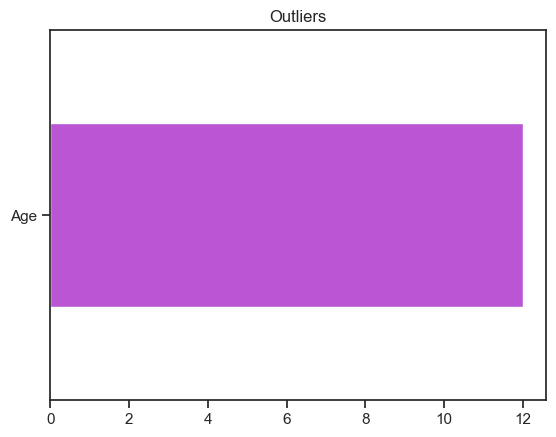

In [116]:
## plot.

ax = outliers.iloc[:1,:].reset_index()\
.drop('index', axis = 1)\
.plot(kind = 'barh',\
title = 'Outliers',\
color = 'mediumorchid',\
legend = False)

ax.set_yticklabels(['Age'])
plt.show()

In [117]:
## treat outliers.

q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
Iqr = q3 - q1

lower_bound = q1 - 1.5 * Iqr
upper_bound = q3 + 1.5 * Iqr

median_value = data['Age'].median()
data['Age'] = data['Age'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

data['Age'] = data['Age'].astype('int64')

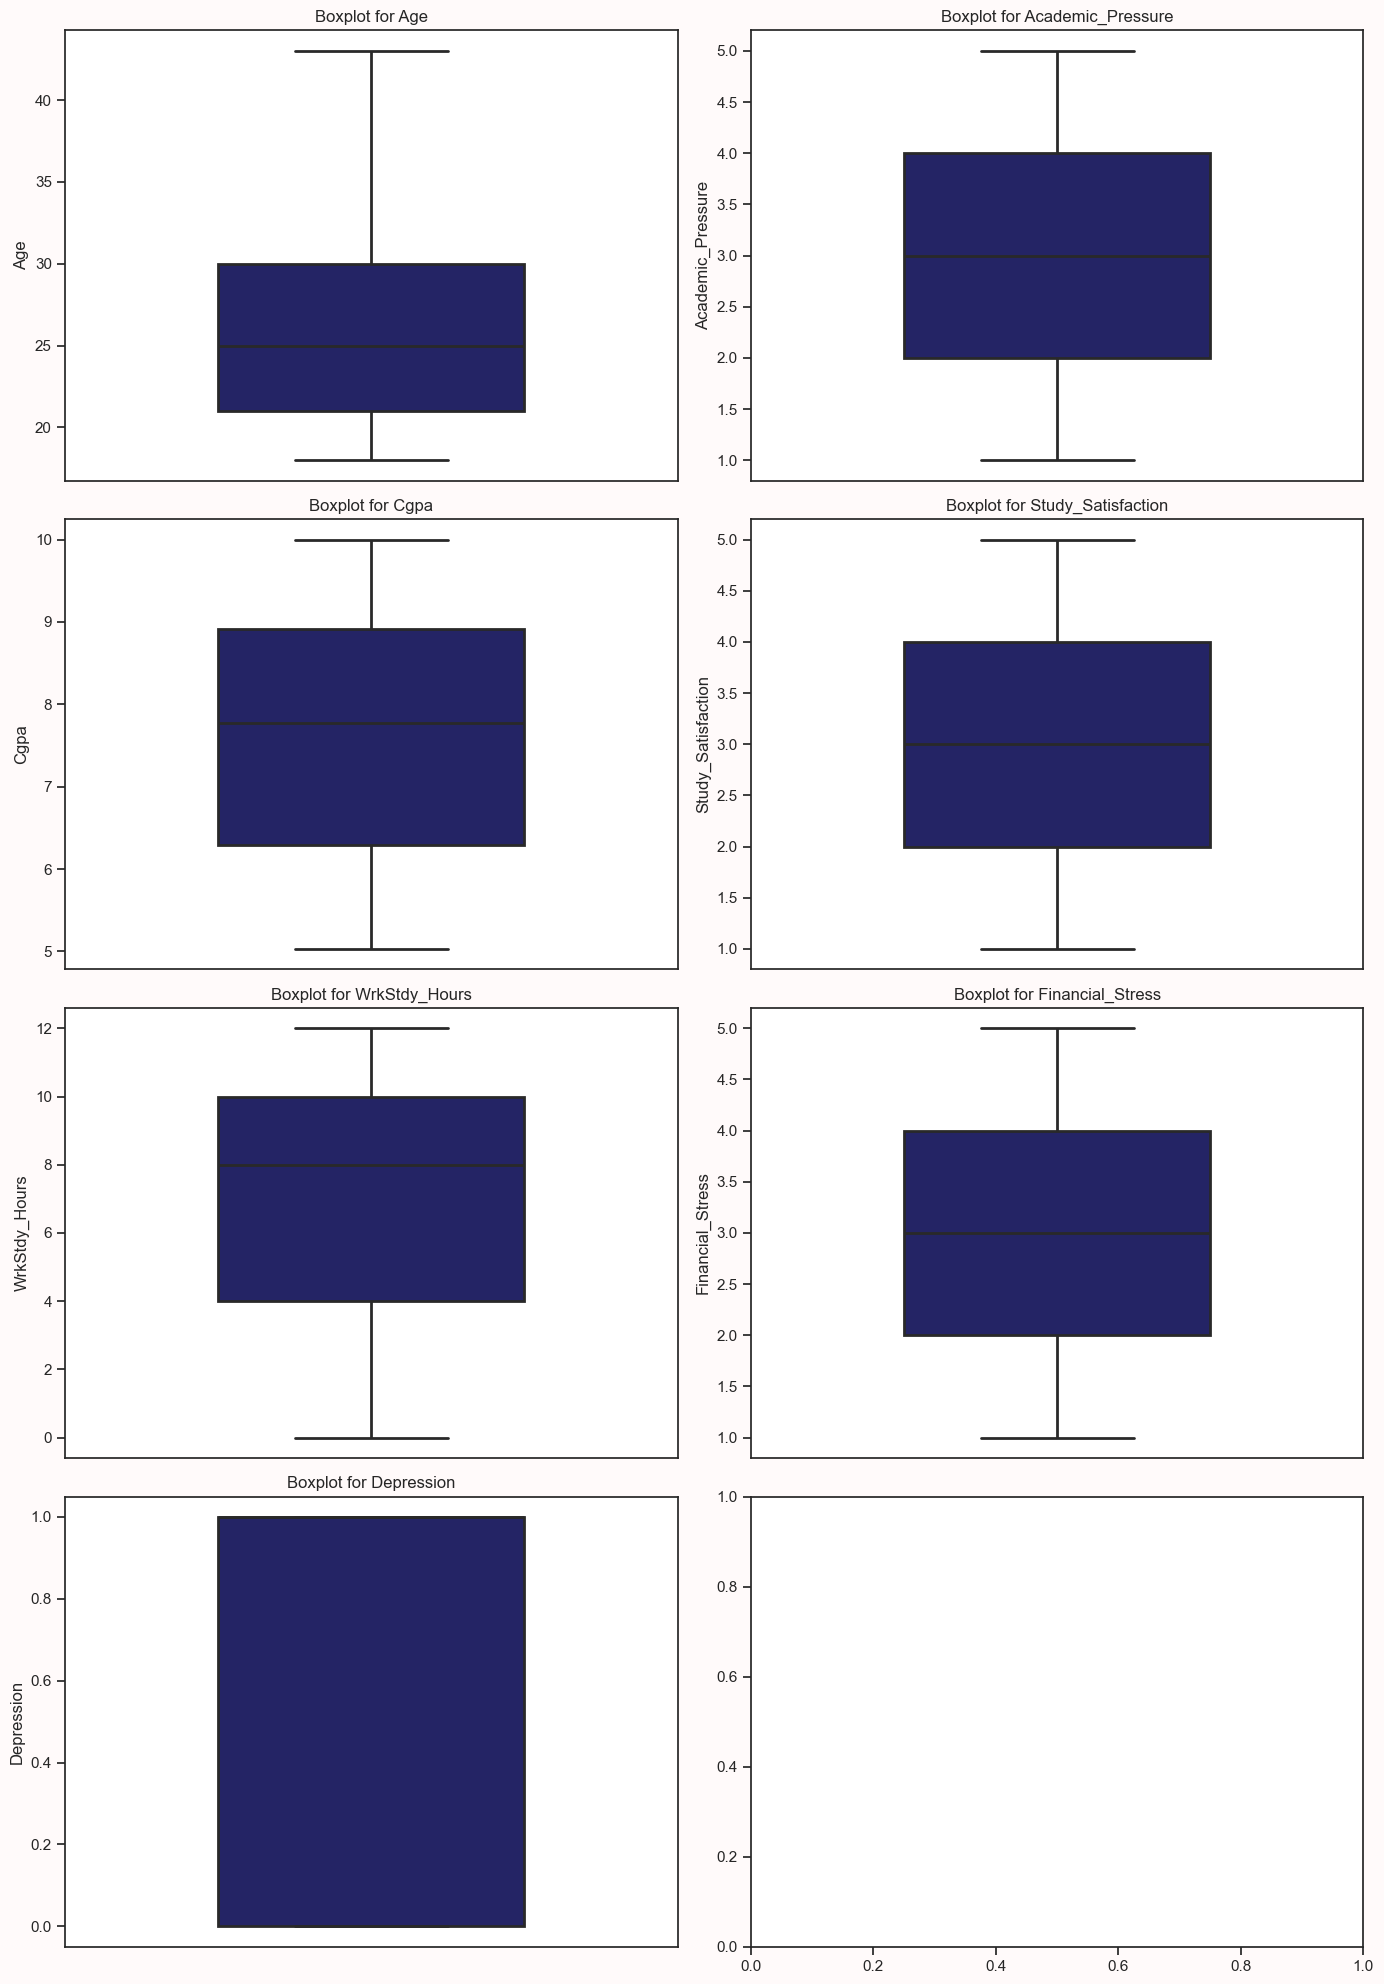

In [118]:
## plot.

fig, axes = plt.subplots(4, 2, figsize = (14, 20), facecolor = 'snow')

axes = axes.flatten()

for ax, i in zip(axes, numerical_columns):
    sns.boxplot(data[i], ax = ax,\
                color = 'midnightblue', width = 0.5,\
                linewidth = 2)
    ax.set_xticks([])
    ax.set_title(f'Boxplot for {i}')
plt.tight_layout()
plt.show()

In [119]:
## zscore method for outliers.

data_zscore = data[data.select_dtypes(include = np.number).columns].apply(zscore)

z_score_outliers = data[(data_zscore.abs() > 3).any(axis = 1)]\
                    .reset_index()\
                    .drop('index', axis = 1)
z_score_outliers

Gender  Age         City Profession  Academic_Pressure  Cgpa  \
0  Female   42       Rajkot    Student                  2  9.03   
1    Male   43       Rajkot    Student                  5  5.64   
2    Male   42      Kolkata    Student                  5  6.10   
3  Female   43       Bhopal    Student                  5  9.67   
4  Female   42  Vasai-Virar    Student                  5  9.56   
5    Male   42     Ludhiana    Student                  5  5.32   
6    Male   41        Patna    Student                  3  5.85   

   Study_Satisfaction     Sleep_Duration Dietary_Habits    Degree  \
0                   5  More than 8 hours       Moderate  Class 12   
1                   2          5-6 hours       Moderate      B.Ed   
2                   1  Less than 5 hours        Healthy      MBBS   
3                   1          7-8 hours        Healthy       MSc   
4                   2          5-6 hours       Moderate       PhD   
5                   4          7-8 hours      Unhealthy  Class 12   
6                   1          5-6 hours       Moderate  Class 12   

  Suicidal_Thoughts  WrkStdy_Hours  Financial_Stress Family_Mental_History  \
0               Yes              3                 1                   Yes   
1                No              9                 4                   Yes   
2               Yes             10                 4                    No   
3               Yes              2                 3                   Yes   
4                No              4                 2                   Yes   
5                No             12                 5                   Yes   
6                No             11                 5                   Yes   

   Depression  
0           0  
1           1  
2           1  
3           0  
4           0  
5           1  
6           1

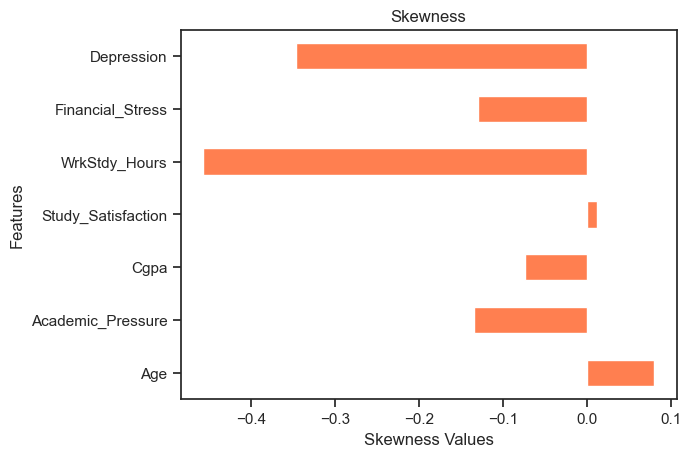

In [120]:
## skewness.

skewness = data[data.select_dtypes(include = np.number).columns].skew()\
.to_frame().reset_index().rename(columns = {'index': 'features', 0: 'skewness'})

ax = skewness.plot(kind = 'barh',\
              title = 'Skewness',\
              color = 'coral',\
              legend = False)

ax.set_yticklabels(['Age', 'Academic_Pressure',\
                    'Cgpa', 'Study_Satisfaction',\
                    'WrkStdy_Hours', 'Financial_Stress', 'Depression'])
ax.set_xlabel('Skewness Values')
ax.set_ylabel('Features')
plt.show()

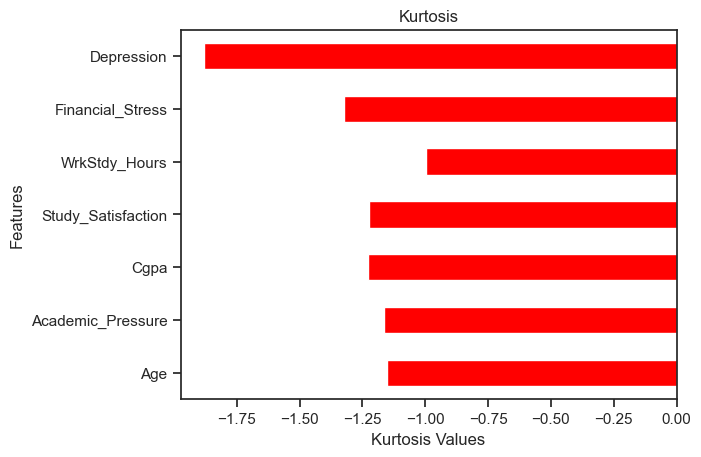

In [121]:
## kurtosis.

kurtosis = data[data.select_dtypes(include = np.number).columns].kurt()\
.to_frame().reset_index().rename(columns = {'index': 'features', 0: 'kurtosis'})

ax = kurtosis.plot(kind = 'barh',\
              title = 'Kurtosis',\
              color = 'red',\
              legend = False)

ax.set_yticklabels(['Age', 'Academic_Pressure',\
                    'Cgpa', 'Study_Satisfaction',\
                    'WrkStdy_Hours', 'Financial_Stress', 'Depression'])
ax.set_xlabel('Kurtosis Values')
ax.set_ylabel('Features')
plt.show()

In [122]:
## data overview.

def overview():
    for i in data.columns:
        print(f'{data[i].name} --> unique count: {data[i].nunique()}')
        print(f'unique values: {data[i].unique()}')
        print('-' * 90)
print(data.shape,'\n')

overview()

(27762, 15) 

Gender --> unique count: 2
unique values: ['Male' 'Female']
------------------------------------------------------------------------------------------
Age --> unique count: 25
unique values: [33 24 31 28 25 29 30 27 19 20 23 18 21 22 34 32 26 39 35 42 36 38 43 37
 41]
------------------------------------------------------------------------------------------
City --> unique count: 30
unique values: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi']
------------------------------------------------------------------------------------------
Profession --> unique count: 1
unique values: ['Student']
------------------------------------------------------------------------------------------
Academic_Pressure --> unique count: 5
u

# Exploratary Data Analysis

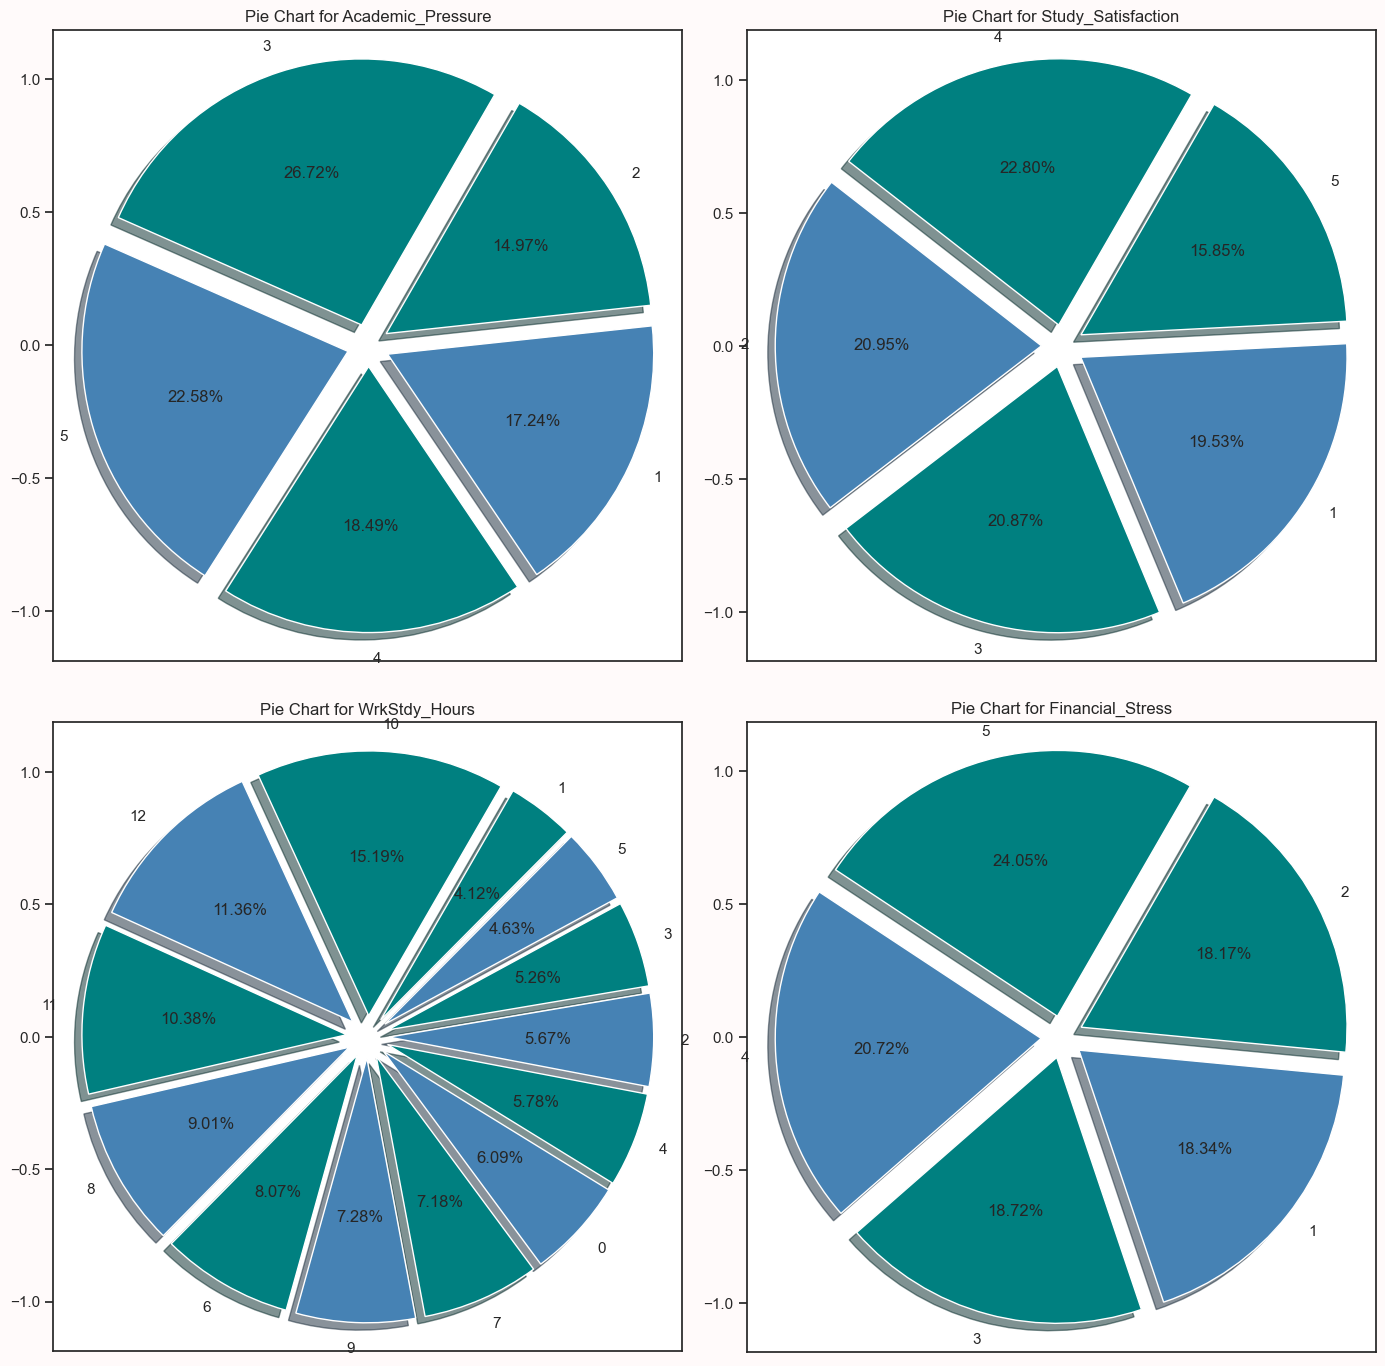

In [123]:
## pie plots.

pie_cols = ['Academic_Pressure', 'Study_Satisfaction',\
            'WrkStdy_Hours', 'Financial_Stress']

fig, axes = plt.subplots(2, 2, figsize = (14, 14), facecolor = 'snow')

axes = axes.flatten()

for ax, i in zip(axes, pie_cols):
    value_counts = data[i].value_counts()
    explode = [0.08] * len(value_counts)
    ax.pie(value_counts,\
        labels = value_counts.index,\
        shadow = True,\
        colors = ['teal', 'steelblue'],\
        autopct = '%0.2f%%',\
        startangle = 60,\
        explode = explode,\
        frame = True,\
        pctdistance = 0.6)
    ax.set_xticks([])
    ax.set_title(f'Pie Chart for {i}')
plt.tight_layout()
plt.show()

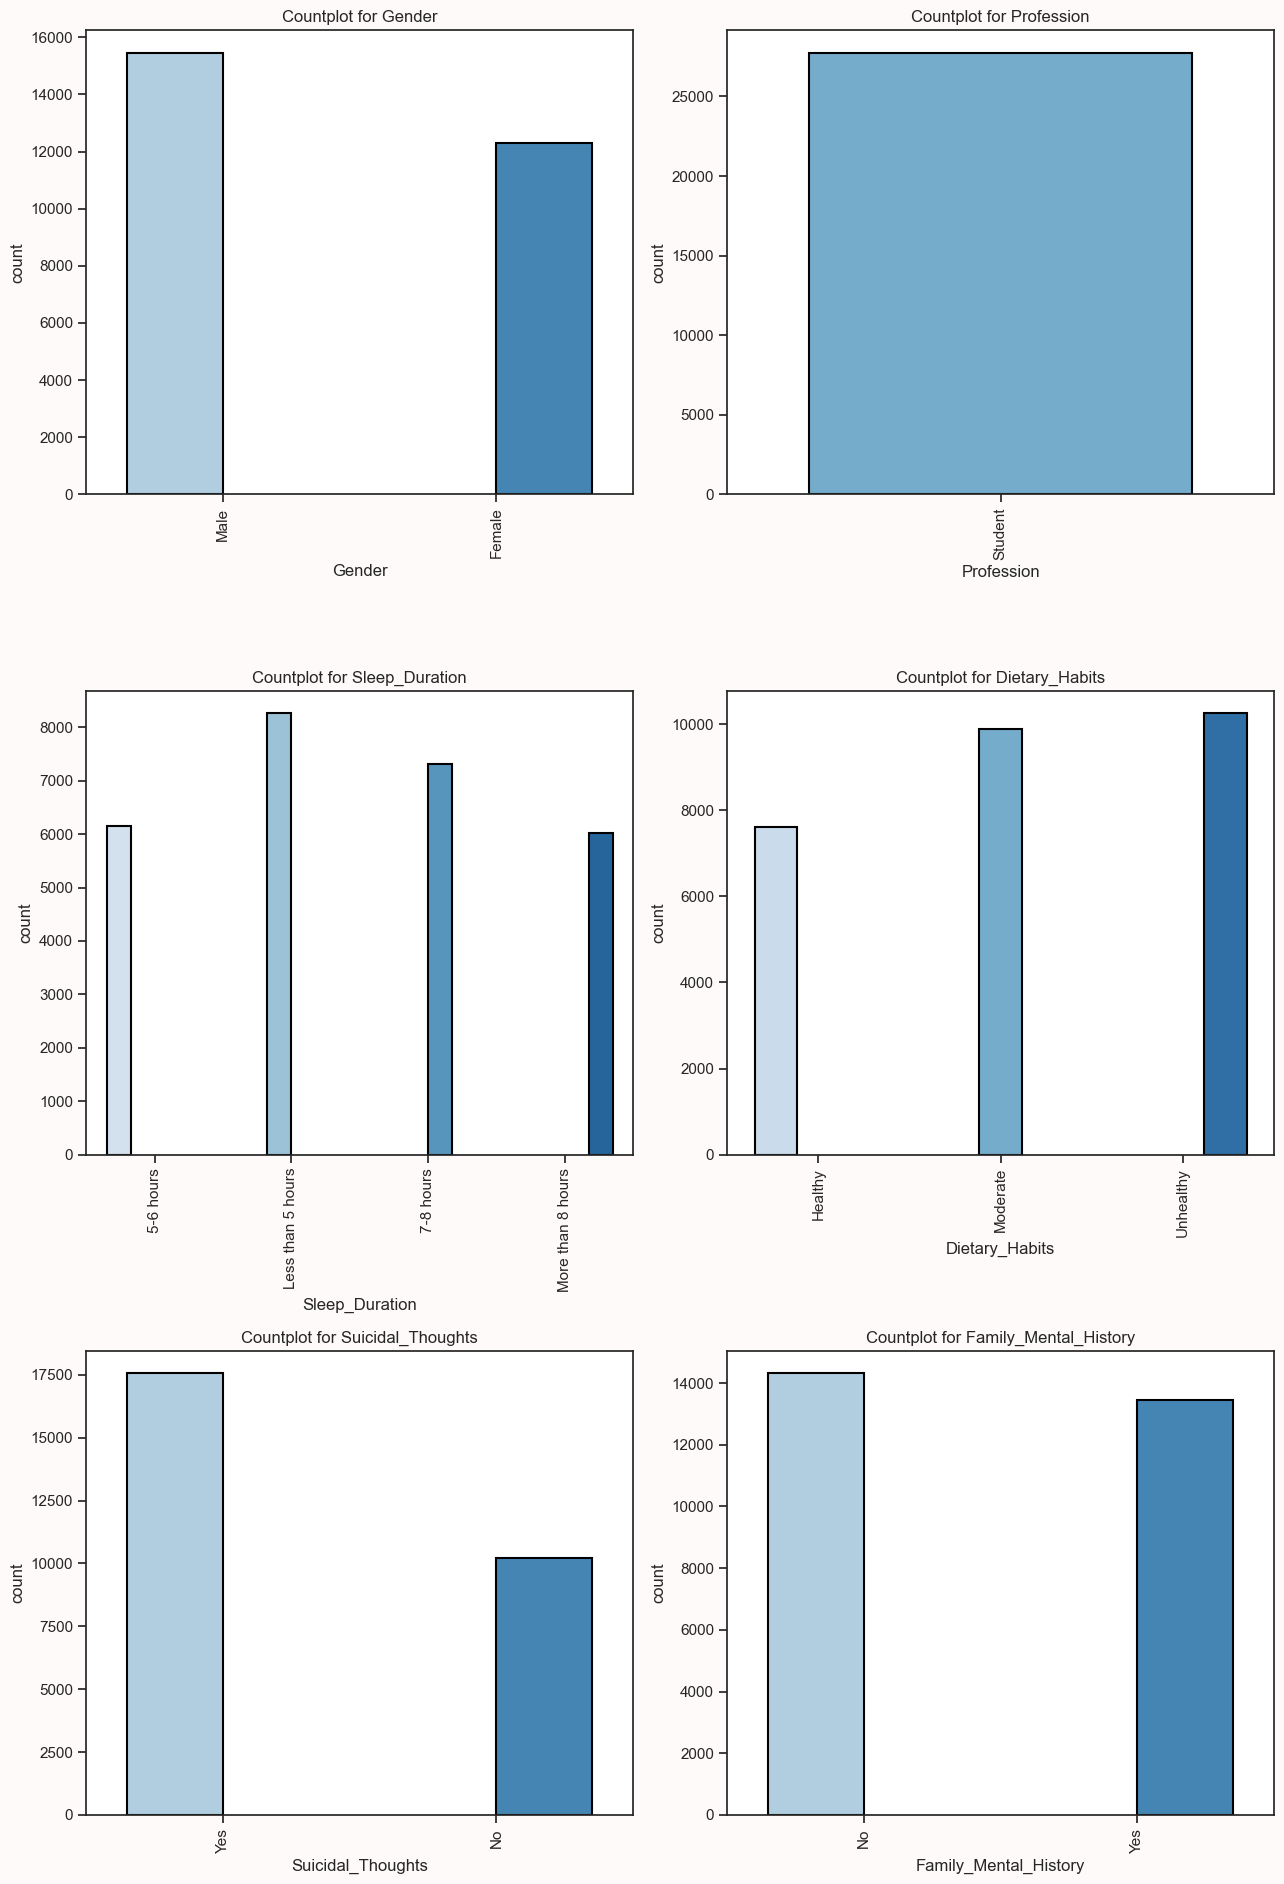

In [124]:
## bar plots.

bar_cols = ['Gender', 'Profession',\
            'Sleep_Duration', 'Dietary_Habits',\
            'Suicidal_Thoughts', 'Family_Mental_History']

fig, axes = plt.subplots(3, 2, figsize = (13, 19), facecolor = 'snow')

axes = axes.flatten()

for ax, i in zip(axes, bar_cols):
    sns.countplot(data = data,\
                  x = i,\
                  palette = 'Blues',\
                  dodge = True,\
                  width = 0.7,\
                  edgecolor = 'black',\
                  linewidth = 1.5,\
                  saturation = 0.8,\
                  ax = ax
)
    ax.set_title(f'Countplot for {i}')
    for i in ax.get_xticklabels():
        i.set_rotation(90)
plt.tight_layout()
plt.show()

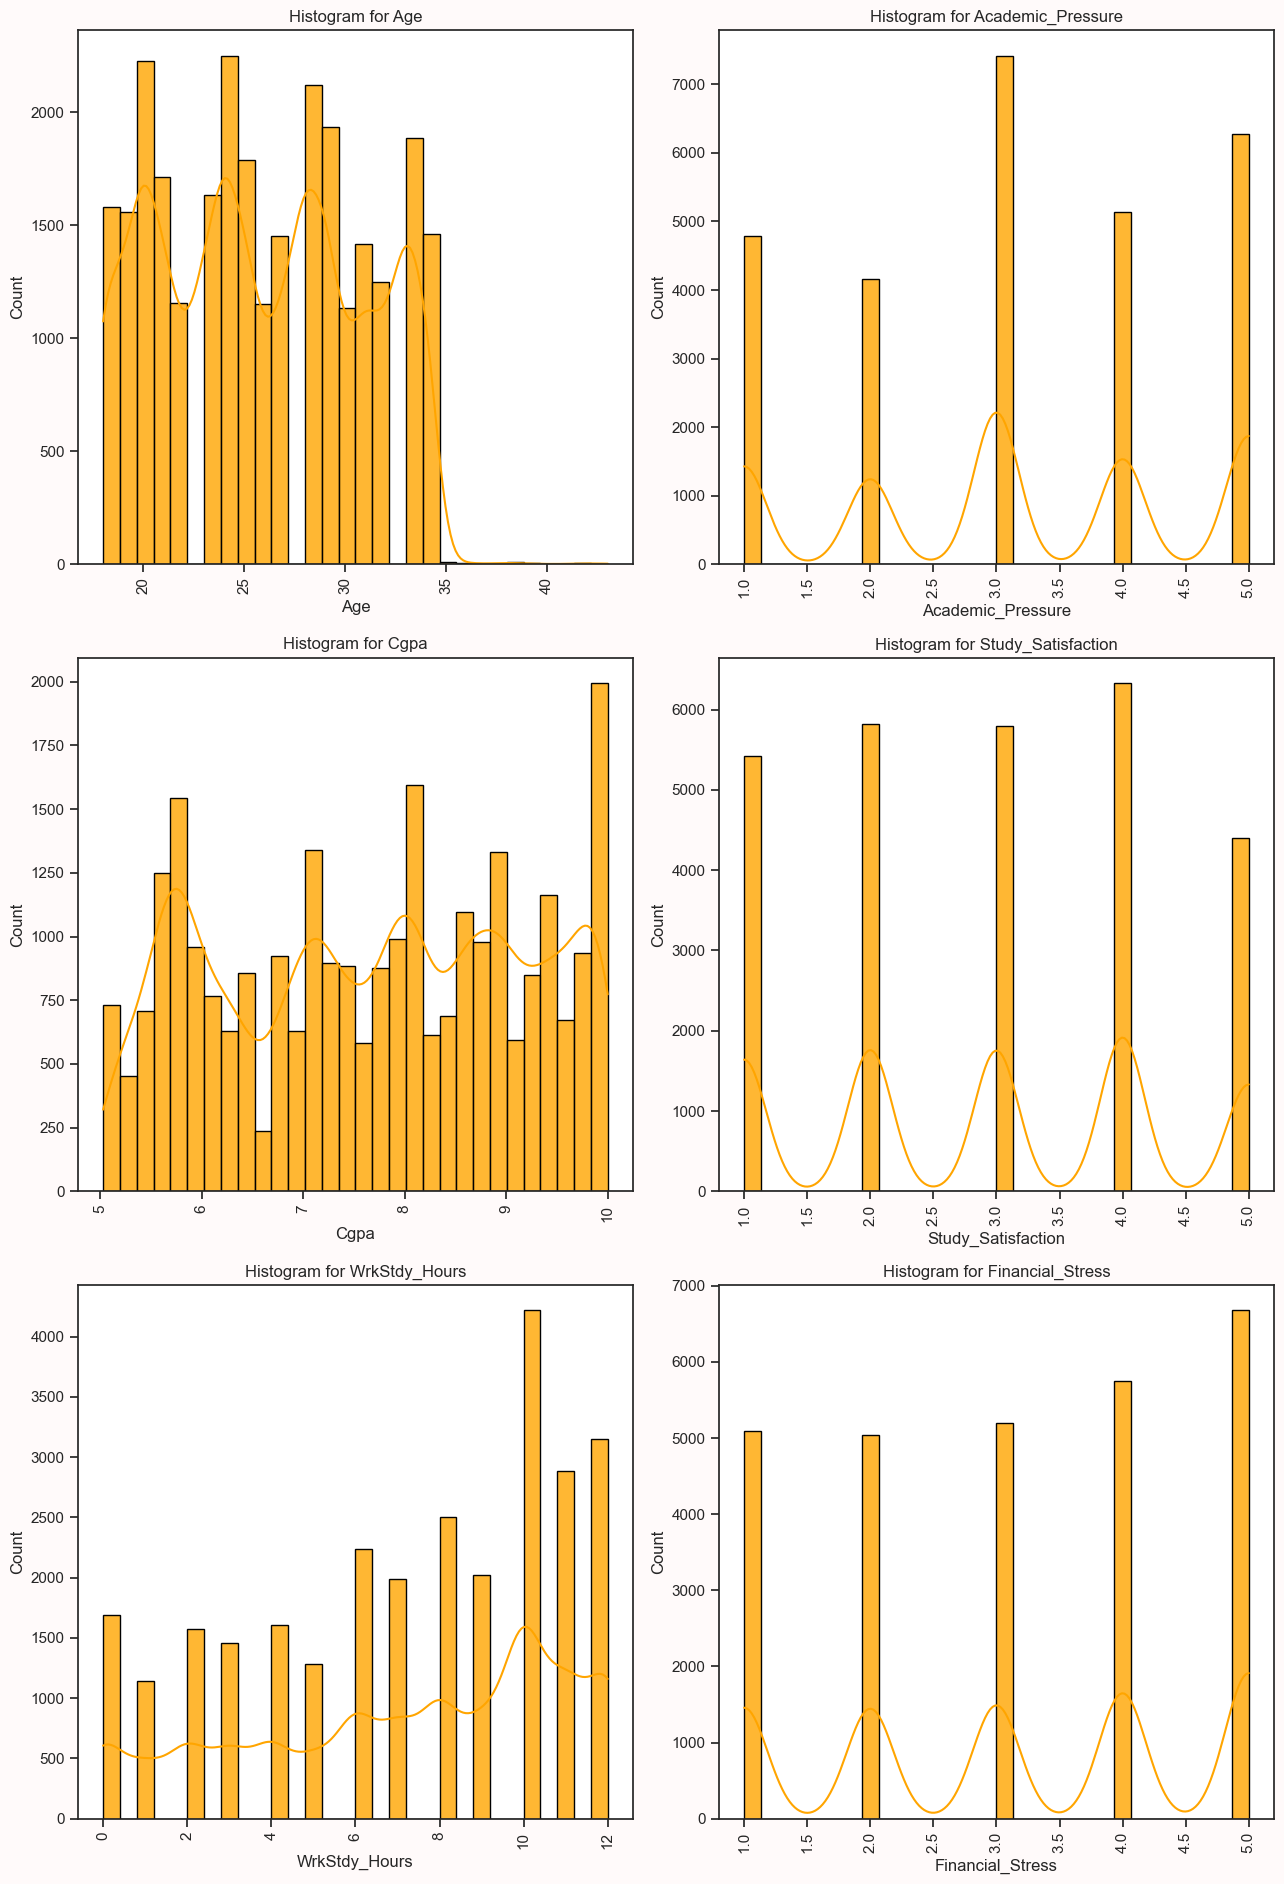

In [125]:
## histogram plot.

nd_cols = data.select_dtypes(include = np.number).columns

fig, axes = plt.subplots(3, 2, figsize = (13, 19), facecolor = 'snow')

axes = axes.flatten()

for ax, i in zip(axes, nd_cols):
    sns.histplot(data[i],\
                 bins = 30,\
                 kde = True,\
                 color = 'orange',\
                 edgecolor = 'black',\
                 alpha = 0.8,\
                 ax = ax
    )
    
    ax.set_title(f'Histogram for {i}')
    for i in ax.get_xticklabels():
        i.set_rotation(90)
plt.tight_layout()
plt.show()

In [126]:
## target variable stats.

summary_stats = data.Depression.describe().round(3)
summary_stats.to_frame()

Depression
count   27762.000
mean        0.585
std         0.493
min         0.000
25%         0.000
50%         1.000
75%         1.000
max         1.000

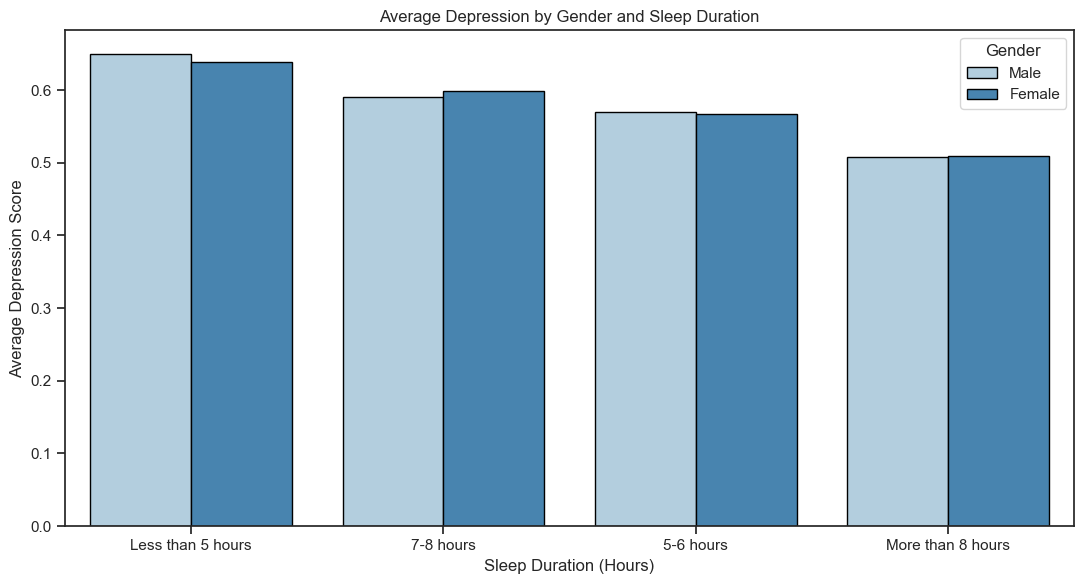

In [127]:
## target vs gender & sleep duration.

filtered_data = data.groupby(['Gender', 'Sleep_Duration'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (11, 6))
sns.barplot(filtered_data,\
            x = 'Sleep_Duration',\
            y = 'Depression',\
            hue = 'Gender',\
            palette = 'Blues',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Gender and Sleep Duration')
plt.ylabel('Average Depression Score')
plt.xlabel('Sleep Duration (Hours)')
plt.tight_layout()
plt.show()

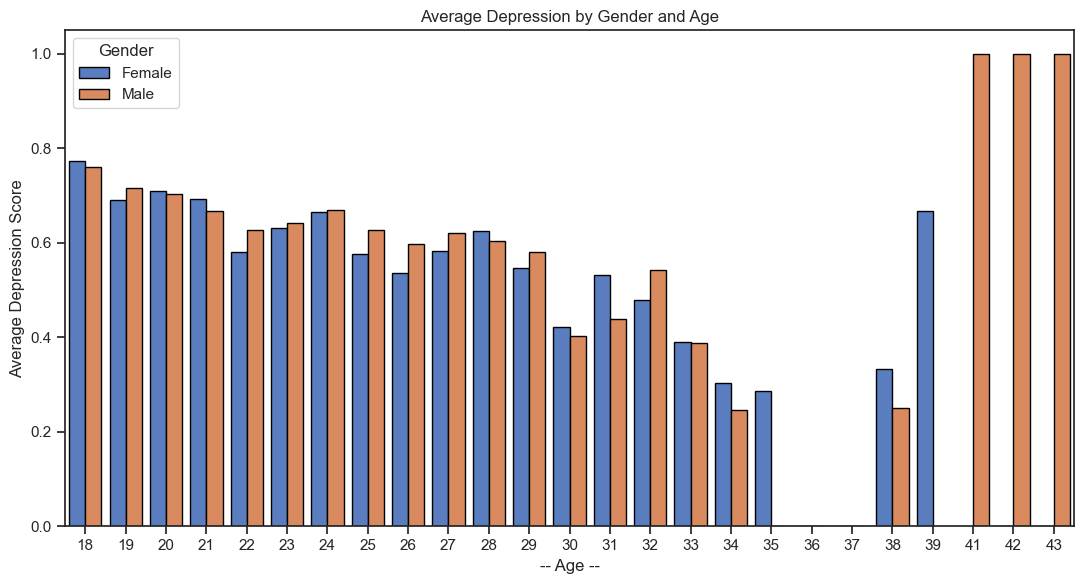

In [128]:
## target vs age & gender.

filtered_data = data.groupby(['Gender', 'Age'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (11, 6))
sns.barplot(filtered_data,\
            x = 'Age',\
            y = 'Depression',\
            hue = 'Gender',\
            palette = 'muted',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Gender and Age')
plt.ylabel('Average Depression Score')
plt.xlabel('-- Age --')
plt.tight_layout()
plt.show()

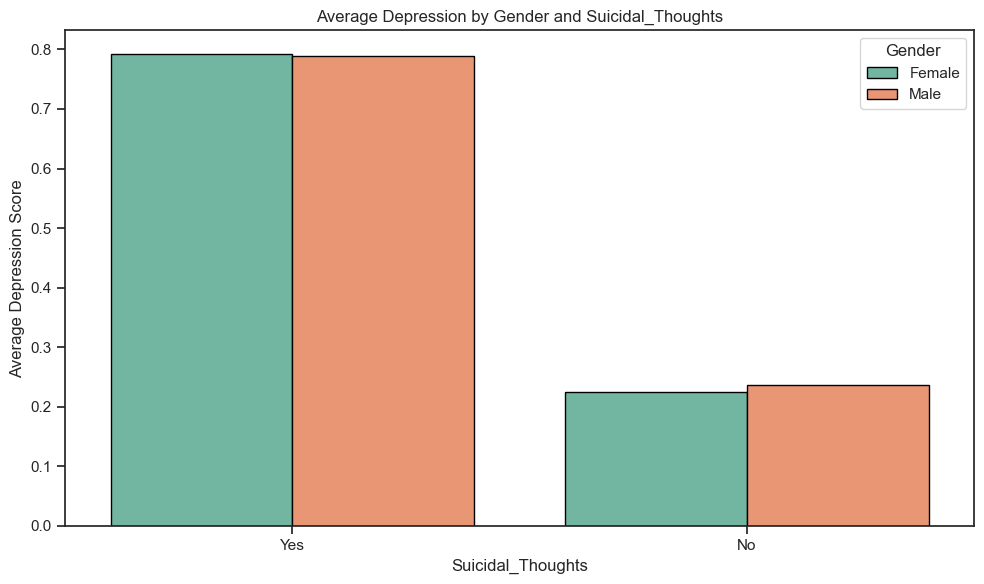

In [129]:
## target vs gender & sucidal thoughts.

filtered_data = data.groupby(['Gender', 'Suicidal_Thoughts'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (10, 6))
sns.barplot(filtered_data,\
            x = 'Suicidal_Thoughts',\
            y = 'Depression',\
            hue = 'Gender',\
            palette = 'Set2',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Gender and Suicidal_Thoughts')
plt.ylabel('Average Depression Score')
plt.xlabel('Suicidal_Thoughts')
plt.tight_layout()
plt.show()

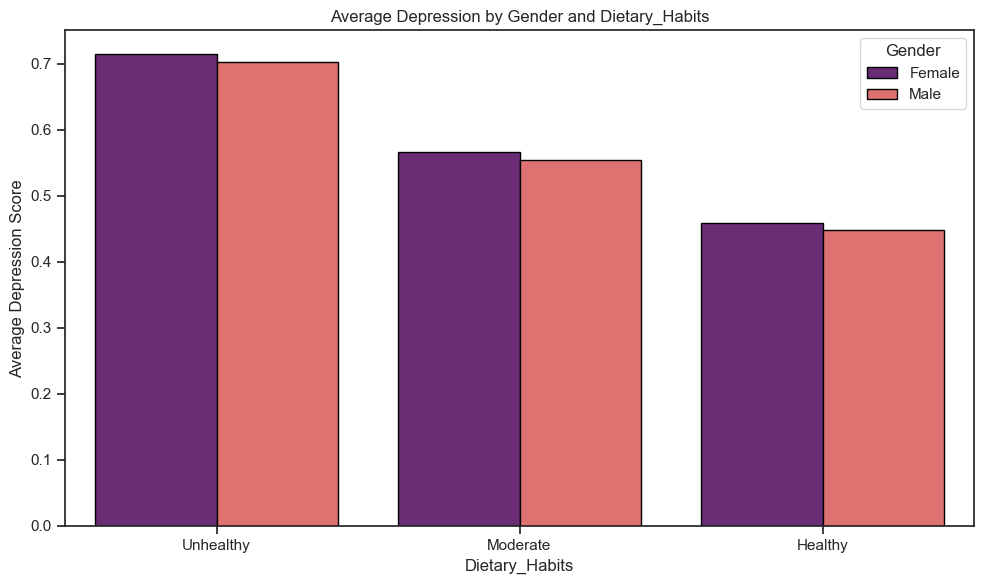

In [130]:
## target vs gender & dietary habits.

filtered_data = data.groupby(['Gender', 'Dietary_Habits'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (10, 6))
sns.barplot(filtered_data,\
            x = 'Dietary_Habits',\
            y = 'Depression',\
            hue = 'Gender',\
            palette = 'magma',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Gender and Dietary_Habits')
plt.ylabel('Average Depression Score')
plt.xlabel('Dietary_Habits')
plt.tight_layout()
plt.show()

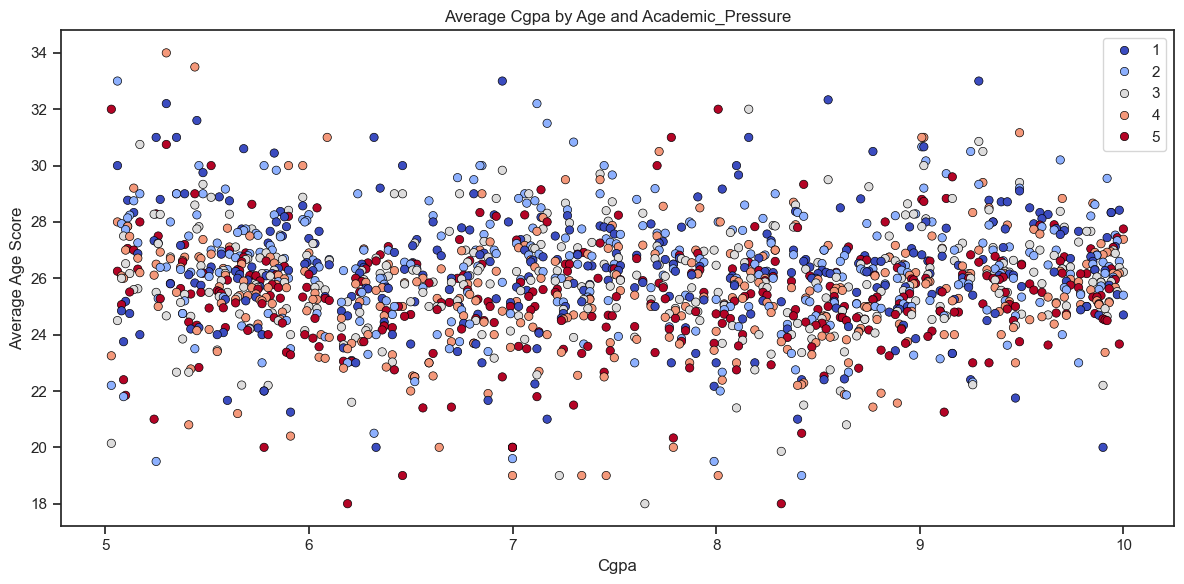

In [131]:
## Cgpa vs age & academic pressure.

filtered_data = data.groupby(['Cgpa', 'Academic_Pressure'])['Age'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,\
            x = 'Cgpa',\
            y = 'Age',\
            hue = 'Academic_Pressure',\
            palette = 'coolwarm',\
            edgecolor = 'black'
         )

plt.title('Average Cgpa by Age and Academic_Pressure')
plt.ylabel('Average Age Score')
plt.xlabel('Cgpa')
plt.tight_layout()
plt.legend()
plt.show()

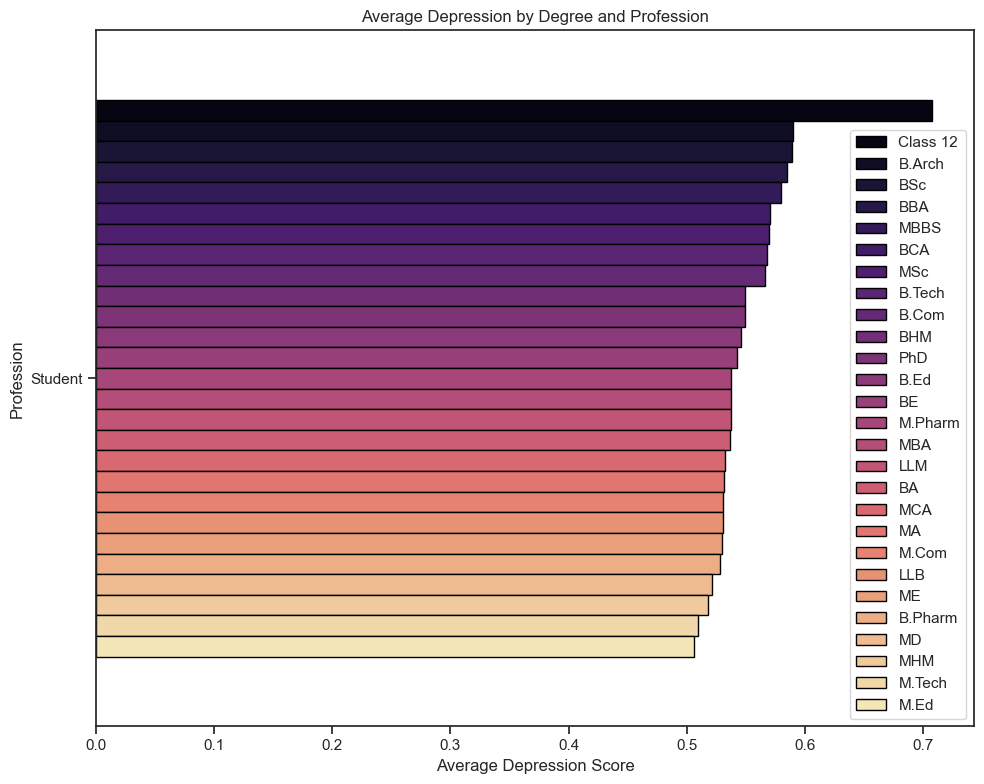

In [132]:
## target vs Degree & Profession.

filtered_data = data.groupby(['Degree', 'Profession'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (10, 8))
sns.barplot(filtered_data,\
            y = 'Profession',\
            x = 'Depression',\
            hue = 'Degree',\
            palette = 'magma',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Degree and Profession')
plt.xlabel('Average Depression Score')
plt.ylabel('Profession')
plt.tight_layout()
plt.legend()
plt.show()

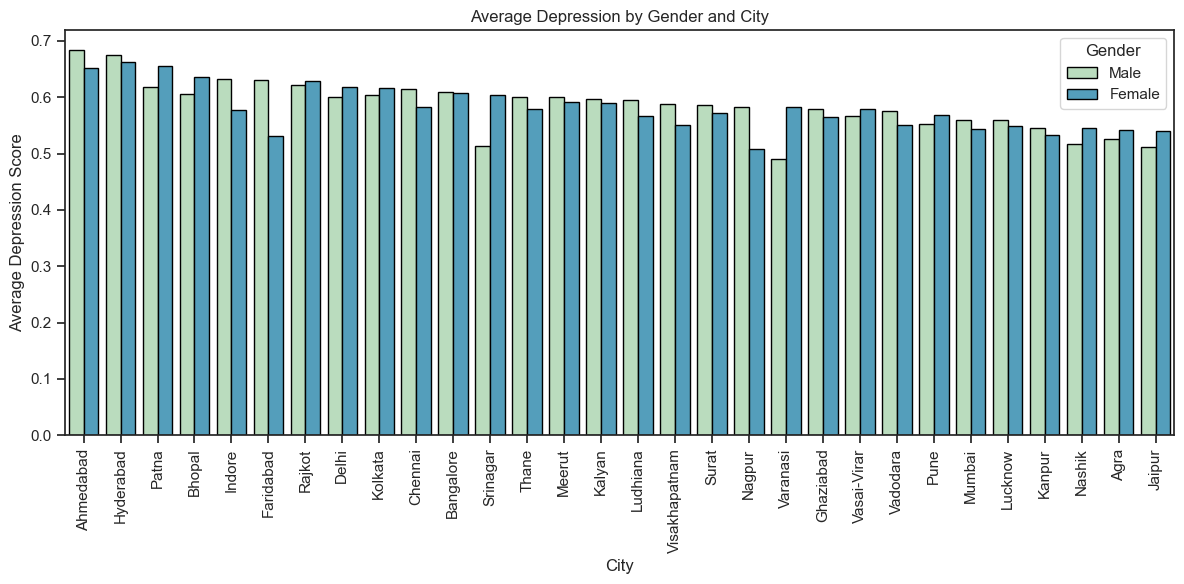

In [133]:
## target vs gender & city.

filtered_data = data.groupby(['Gender', 'City'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,\
            x = 'City',\
            y = 'Depression',\
            hue = 'Gender',\
            palette = 'GnBu',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Gender and City')
plt.ylabel('Average Depression Score')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

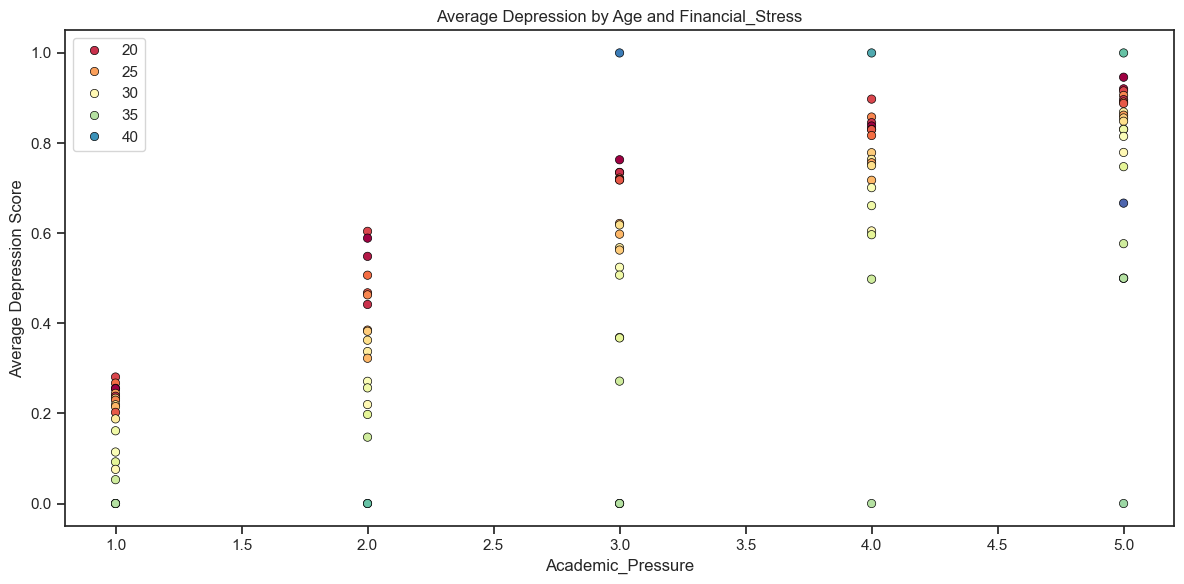

In [134]:
## target vs age & academic pressure.

filtered_data = data.groupby(['Age', 'Academic_Pressure'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,\
            x = 'Academic_Pressure',\
            y = 'Depression',\
            hue = 'Age',\
            palette = 'Spectral',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Age and Financial_Stress')
plt.ylabel('Average Depression Score')
plt.xlabel('Academic_Pressure')
plt.tight_layout()
plt.legend()
plt.show()

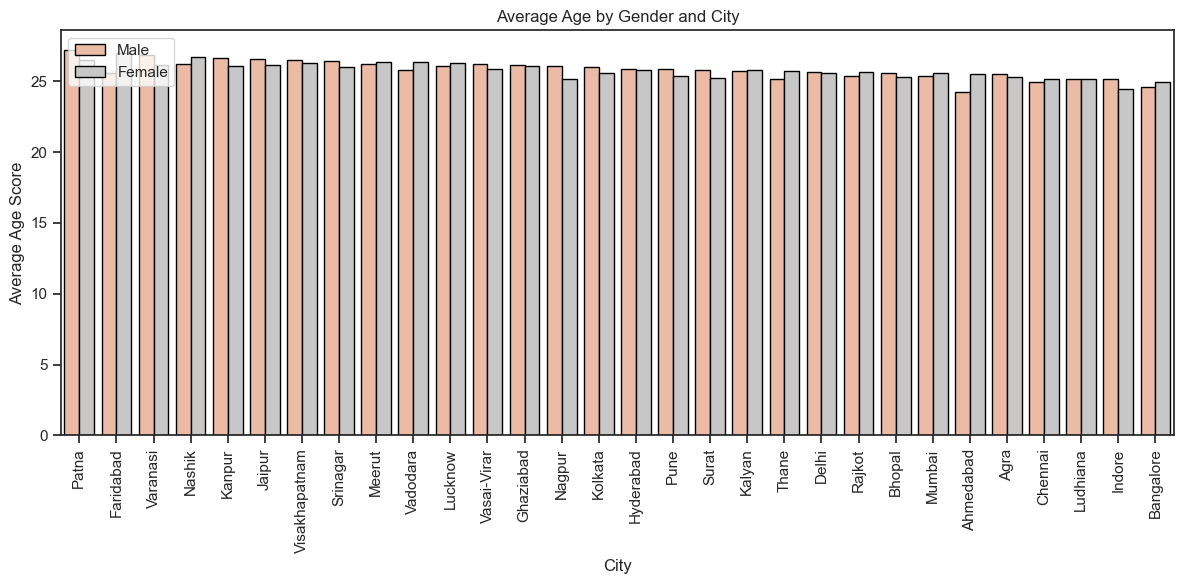

In [135]:
## age vs gender & city.

filtered_data = data.groupby(['Gender', 'City'])['Age'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,\
            x = 'City',\
            y = 'Age',\
            hue = 'Gender',\
            palette = 'RdGy',\
            edgecolor = 'black'
         )

plt.title('Average Age by Gender and City')
plt.ylabel('Average Age Score')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.legend(loc = 'upper left')
plt.show()

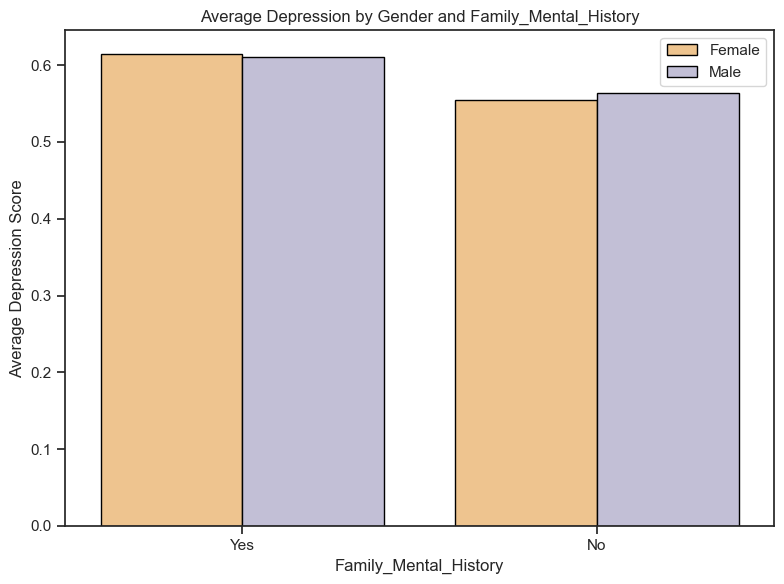

In [136]:
## target vs gender & family mental history.

filtered_data = data.groupby(['Gender', 'Family_Mental_History'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (8, 6))
sns.barplot(filtered_data,\
            x = 'Family_Mental_History',\
            y = 'Depression',\
            hue = 'Gender',\
            palette = 'PuOr',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Gender and Family_Mental_History')
plt.ylabel('Average Depression Score')
plt.xlabel('Family_Mental_History')
plt.tight_layout()
plt.legend()
plt.show()

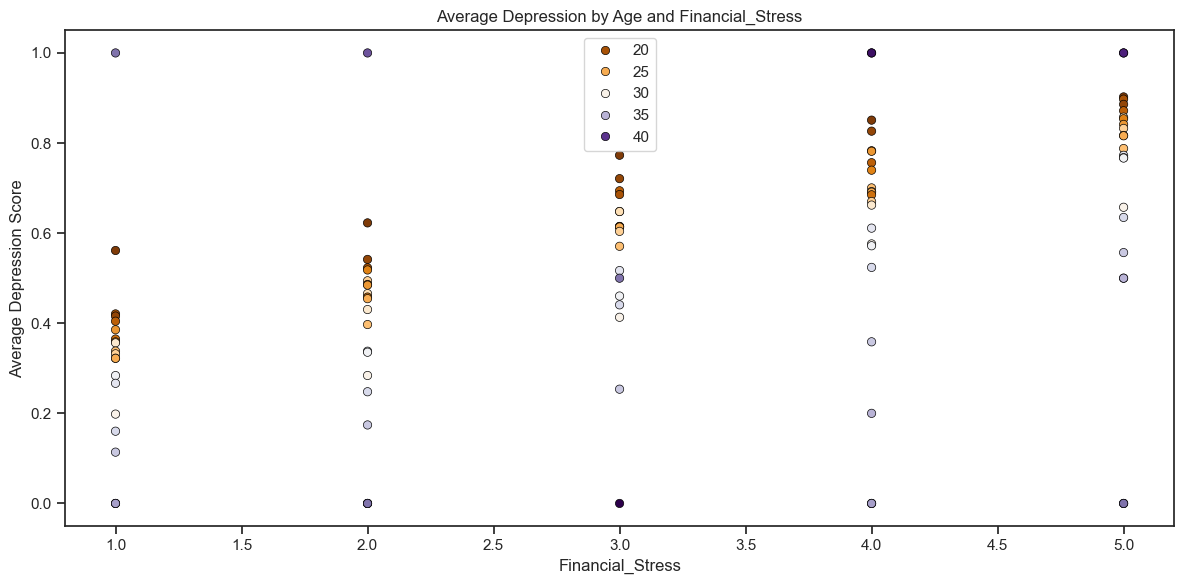

In [137]:
## target vs age & financial stress.

filtered_data = data.groupby(['Age', 'Financial_Stress'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,\
            x = 'Financial_Stress',\
            y = 'Depression',\
            hue = 'Age',\
            palette = 'PuOr',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Age and Financial_Stress')
plt.ylabel('Average Depression Score')
plt.xlabel('Financial_Stress')
plt.tight_layout()
plt.legend()
plt.show()

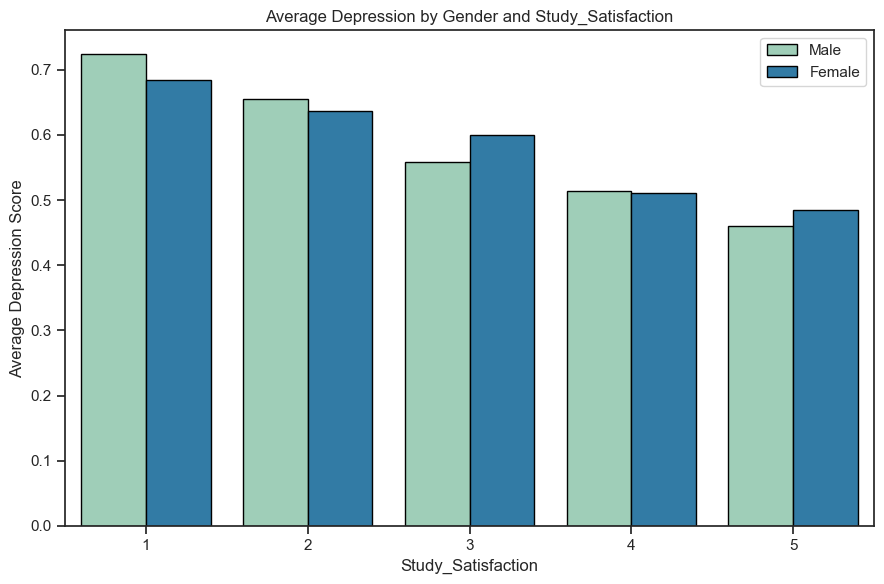

In [138]:
## target vs gender & study satisfaction.

filtered_data = data.groupby(['Gender', 'Study_Satisfaction'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (9, 6))
sns.barplot(filtered_data,\
            x = 'Study_Satisfaction',\
            y = 'Depression',\
            hue = 'Gender',\
            palette = 'YlGnBu',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Gender and Study_Satisfaction')
plt.ylabel('Average Depression Score')
plt.xlabel('Study_Satisfaction')
plt.tight_layout()
plt.legend()
plt.show()

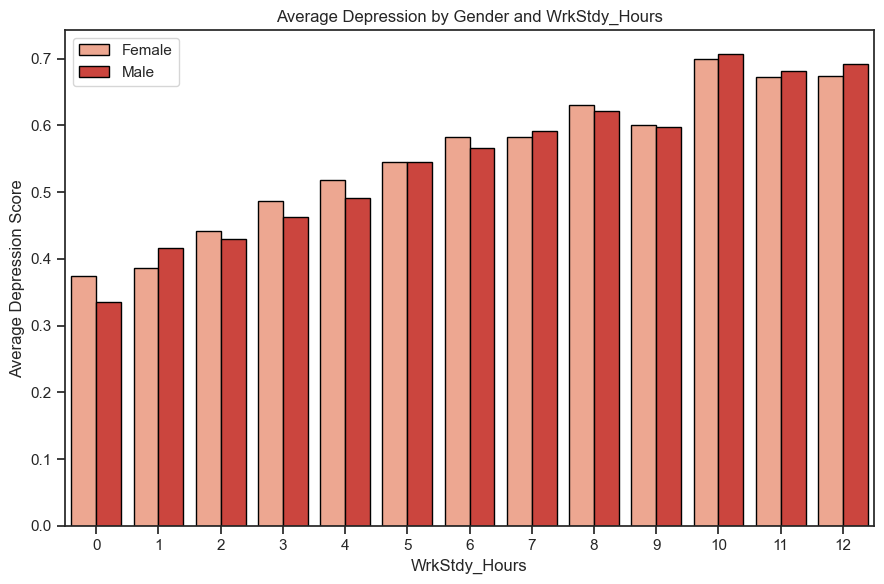

In [139]:
## target vs gender & wrkstdy hours.

filtered_data = data.groupby(['Gender', 'WrkStdy_Hours'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (9, 6))
sns.barplot(filtered_data,\
            x = 'WrkStdy_Hours',\
            y = 'Depression',\
            hue = 'Gender',\
            palette = 'Reds',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Gender and WrkStdy_Hours')
plt.ylabel('Average Depression Score')
plt.xlabel('WrkStdy_Hours')
plt.tight_layout()
plt.legend()
plt.show()

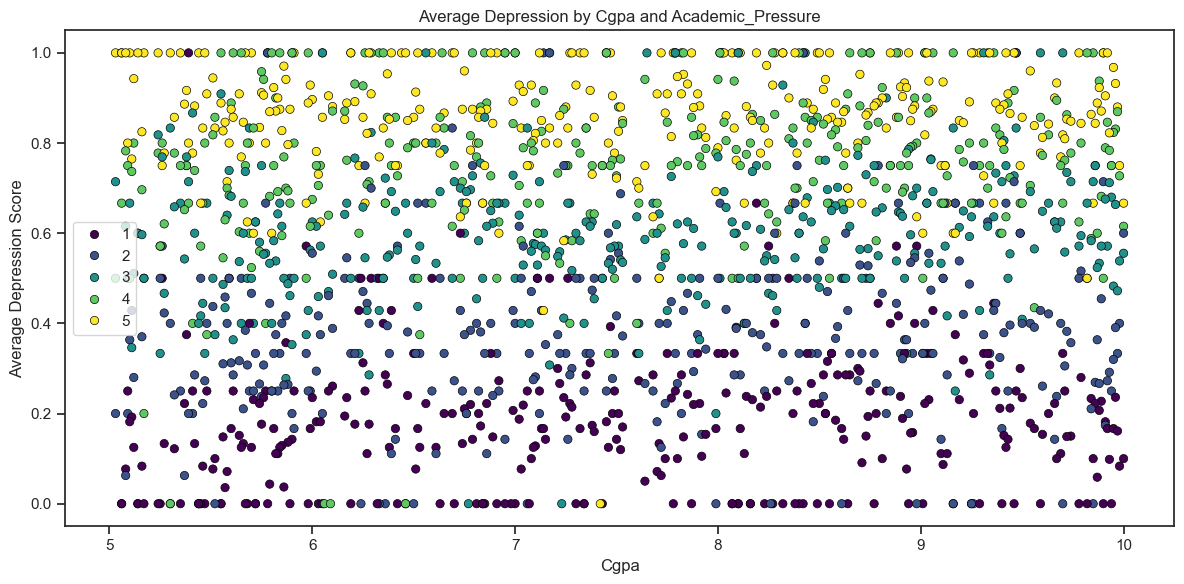

In [140]:
## Cgpa vs target & academic pressure.

filtered_data = data.groupby(['Cgpa', 'Academic_Pressure'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,\
            x = 'Cgpa',\
            y = 'Depression',\
            hue = 'Academic_Pressure',\
            palette = 'viridis',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Cgpa and Academic_Pressure')
plt.ylabel('Average Depression Score')
plt.xlabel('Cgpa')
plt.tight_layout()
plt.legend()
plt.show()

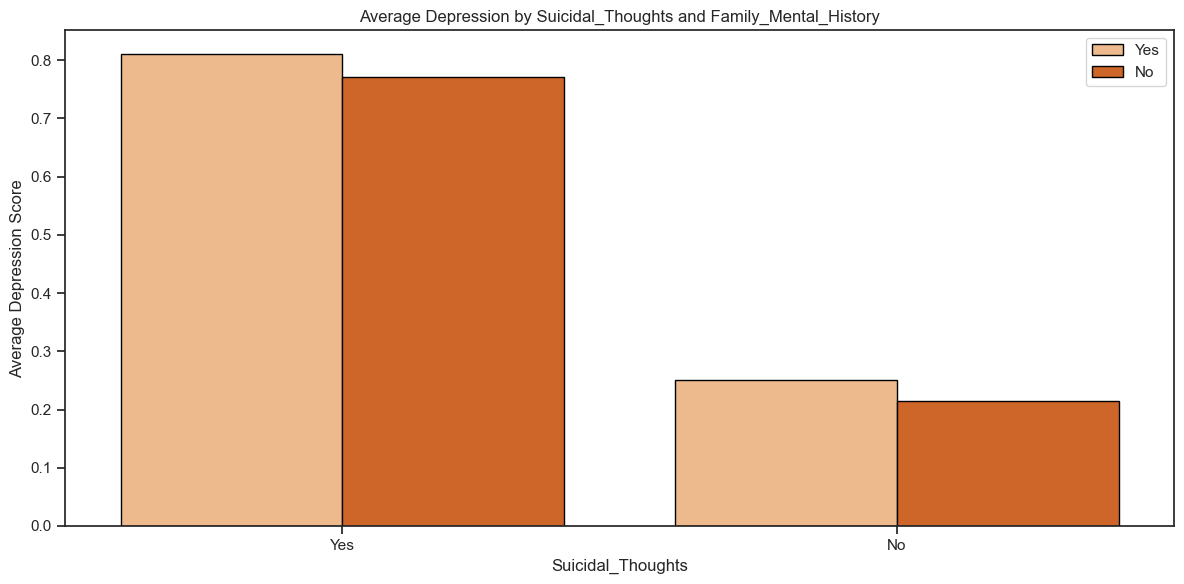

In [141]:
## suicidal thoughts vs target & family mental history.

filtered_data = data.groupby(['Suicidal_Thoughts', 'Family_Mental_History'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,\
            x = 'Suicidal_Thoughts',\
            y = 'Depression',\
            hue = 'Family_Mental_History',\
            palette = 'Oranges',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Suicidal_Thoughts and Family_Mental_History')
plt.ylabel('Average Depression Score')
plt.xlabel('Suicidal_Thoughts')
plt.tight_layout()
plt.legend()
plt.show()

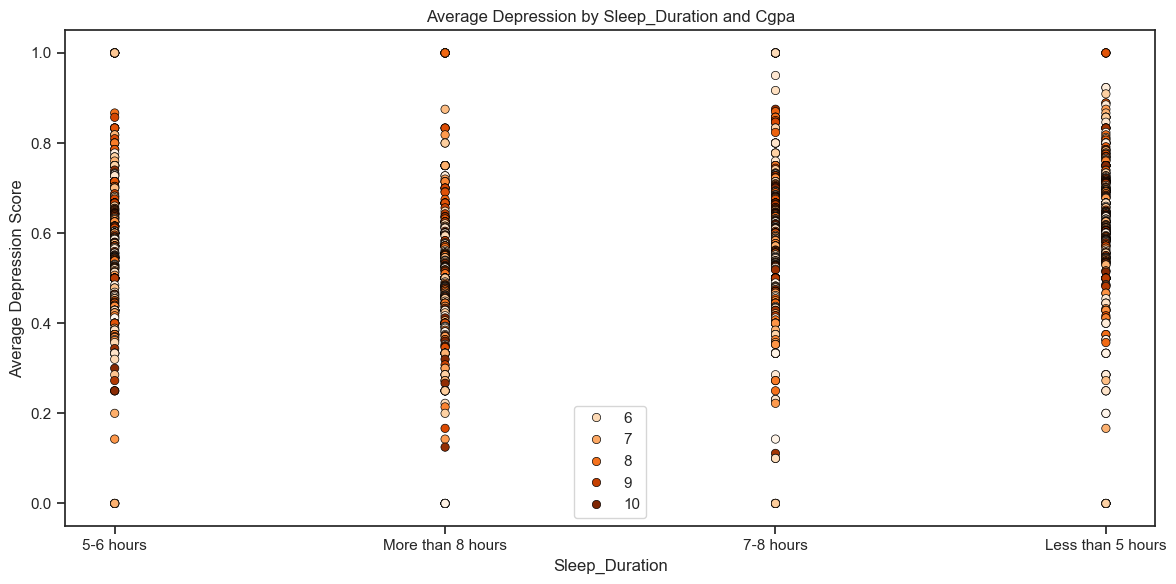

In [142]:
## sleep duration vs target & cgpa.

filtered_data = data.groupby(['Cgpa', 'Sleep_Duration'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,\
            x = 'Sleep_Duration',\
            y = 'Depression',\
            hue = 'Cgpa',\
            palette = 'Oranges',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Sleep_Duration and Cgpa')
plt.ylabel('Average Depression Score')
plt.xlabel('Sleep_Duration')
plt.tight_layout()
plt.legend()
plt.show()

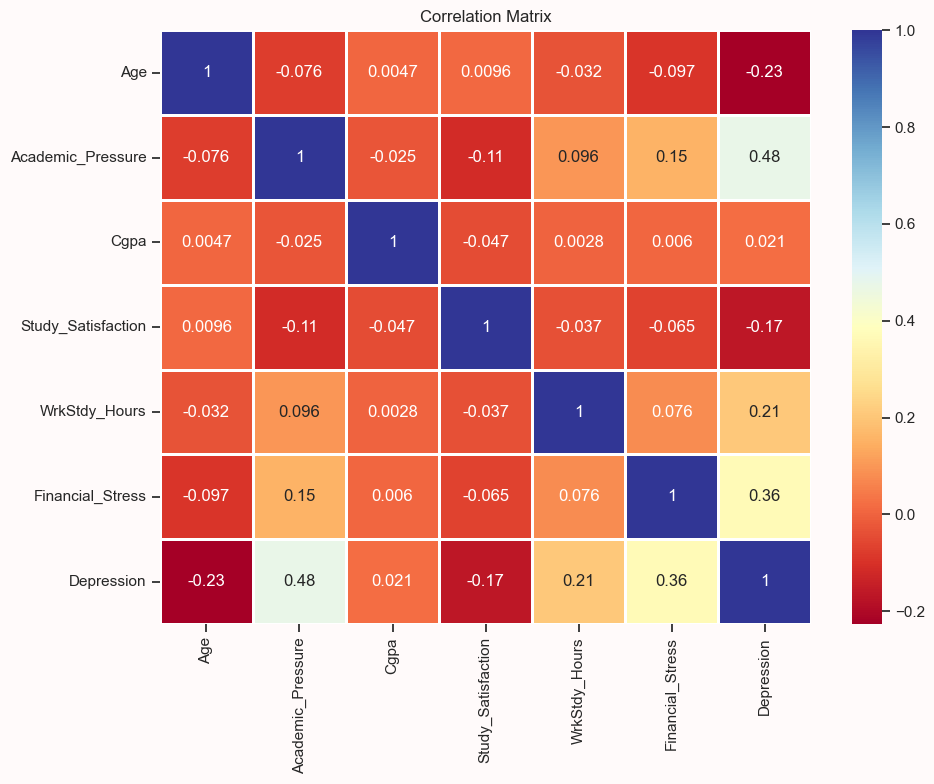

In [143]:
## correlationship matrix.

corr_mat = data.select_dtypes(include = np.number)

plt.figure(figsize = (10, 8), facecolor = 'snow')
sns.heatmap(corr_mat.corr(),\
           annot = True,\
           cbar = True,\
           cmap = 'RdYlBu',\
           linewidths = 2)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<Figure size 1000x1400 with 0 Axes>

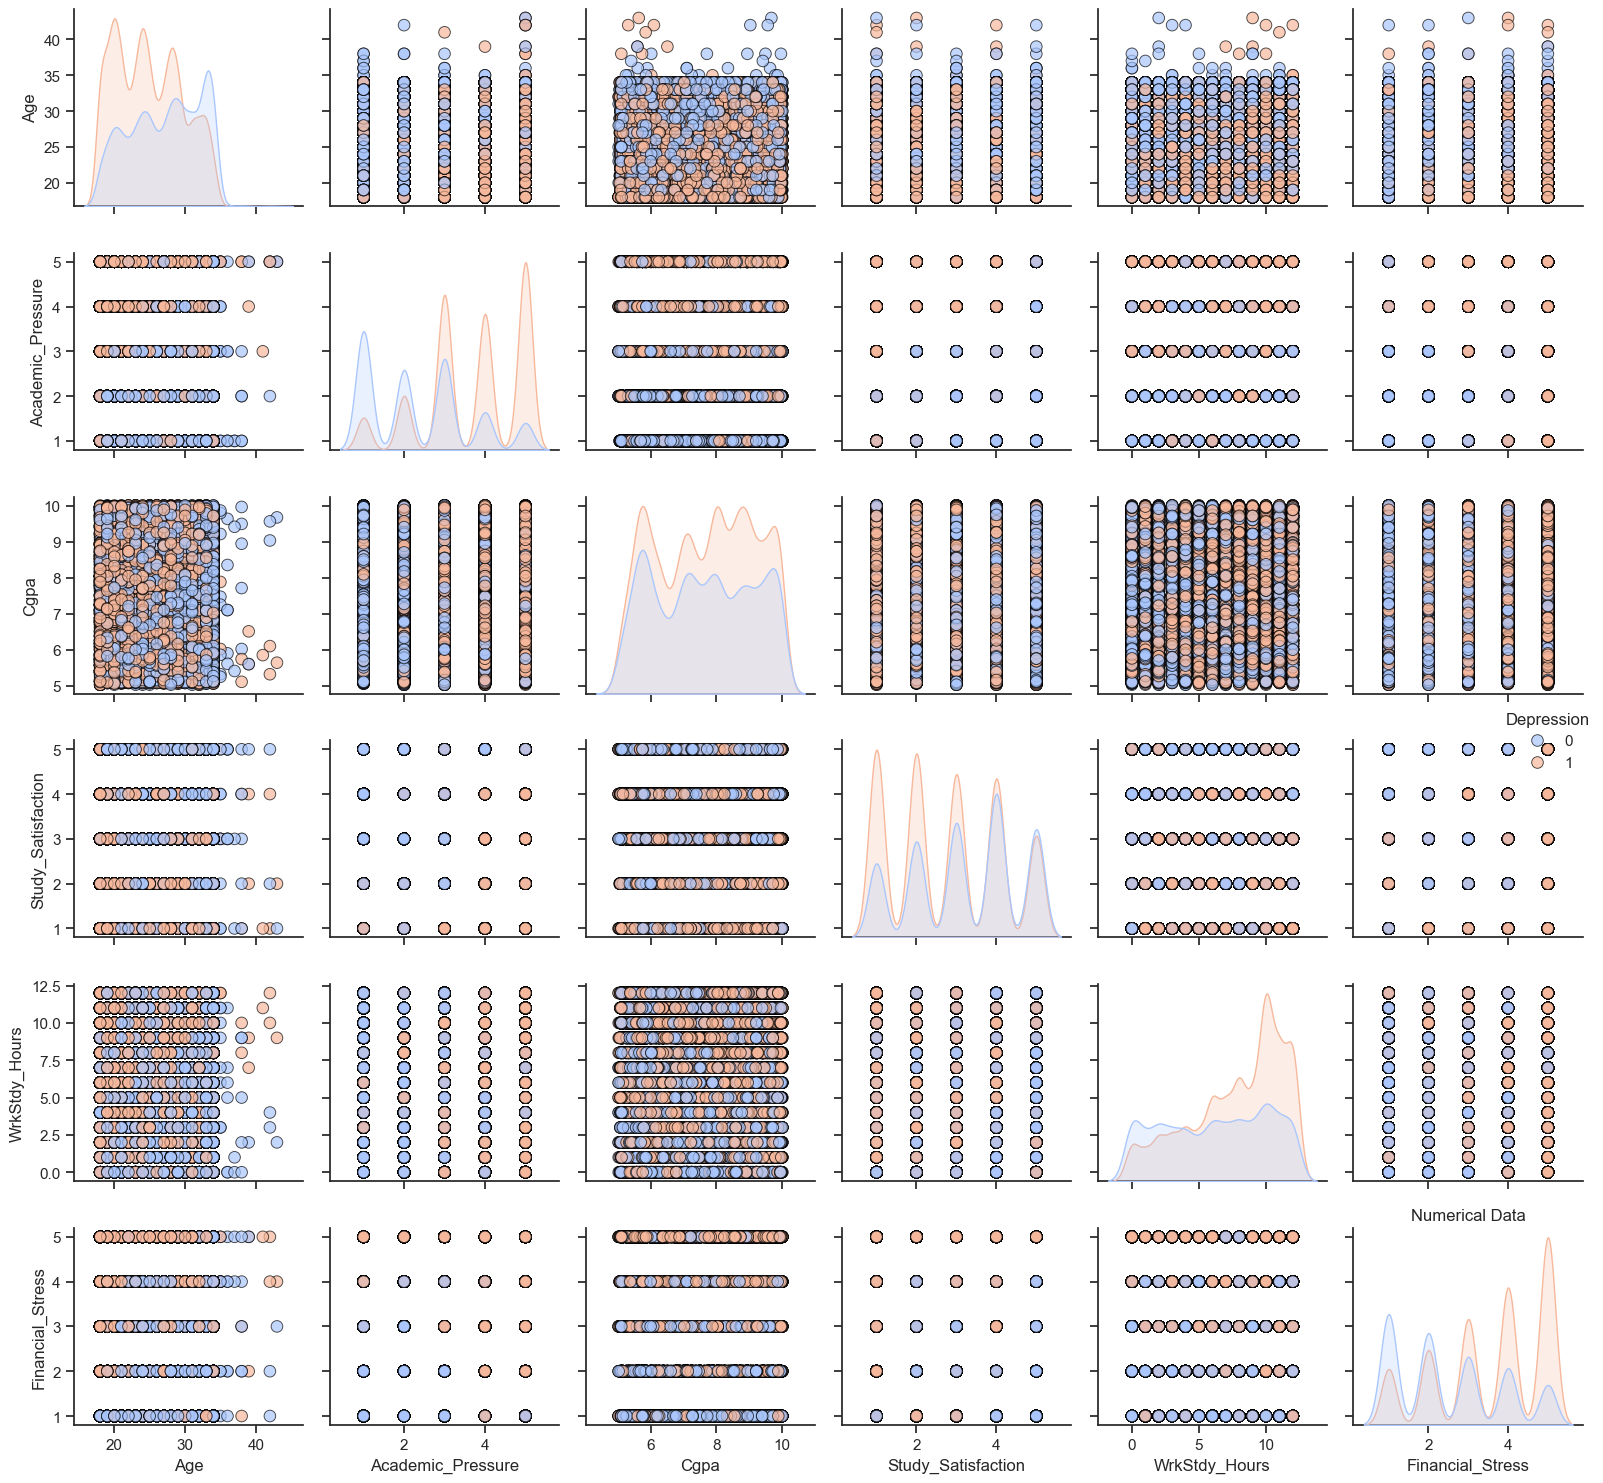

In [144]:
## pairplot --> scatter.

pair_cols = data.select_dtypes(include = np.number)

plt.figure(figsize = (10, 14), facecolor = 'snow')
pairplot = sns.pairplot(pair_cols,\
                        height = 2.5,\
                        plot_kws = {'alpha': 0.7, 's': 70, 'edgecolor': 'black'},\
                        kind = "scatter",\
                        diag_kind = "kde",\
                        markers = 'o',\
                        hue = 'Depression',\
                        palette = 'coolwarm'
)
plt.title('Numerical Data')
plt.tight_layout()
plt.show()

<Figure size 1000x1400 with 0 Axes>

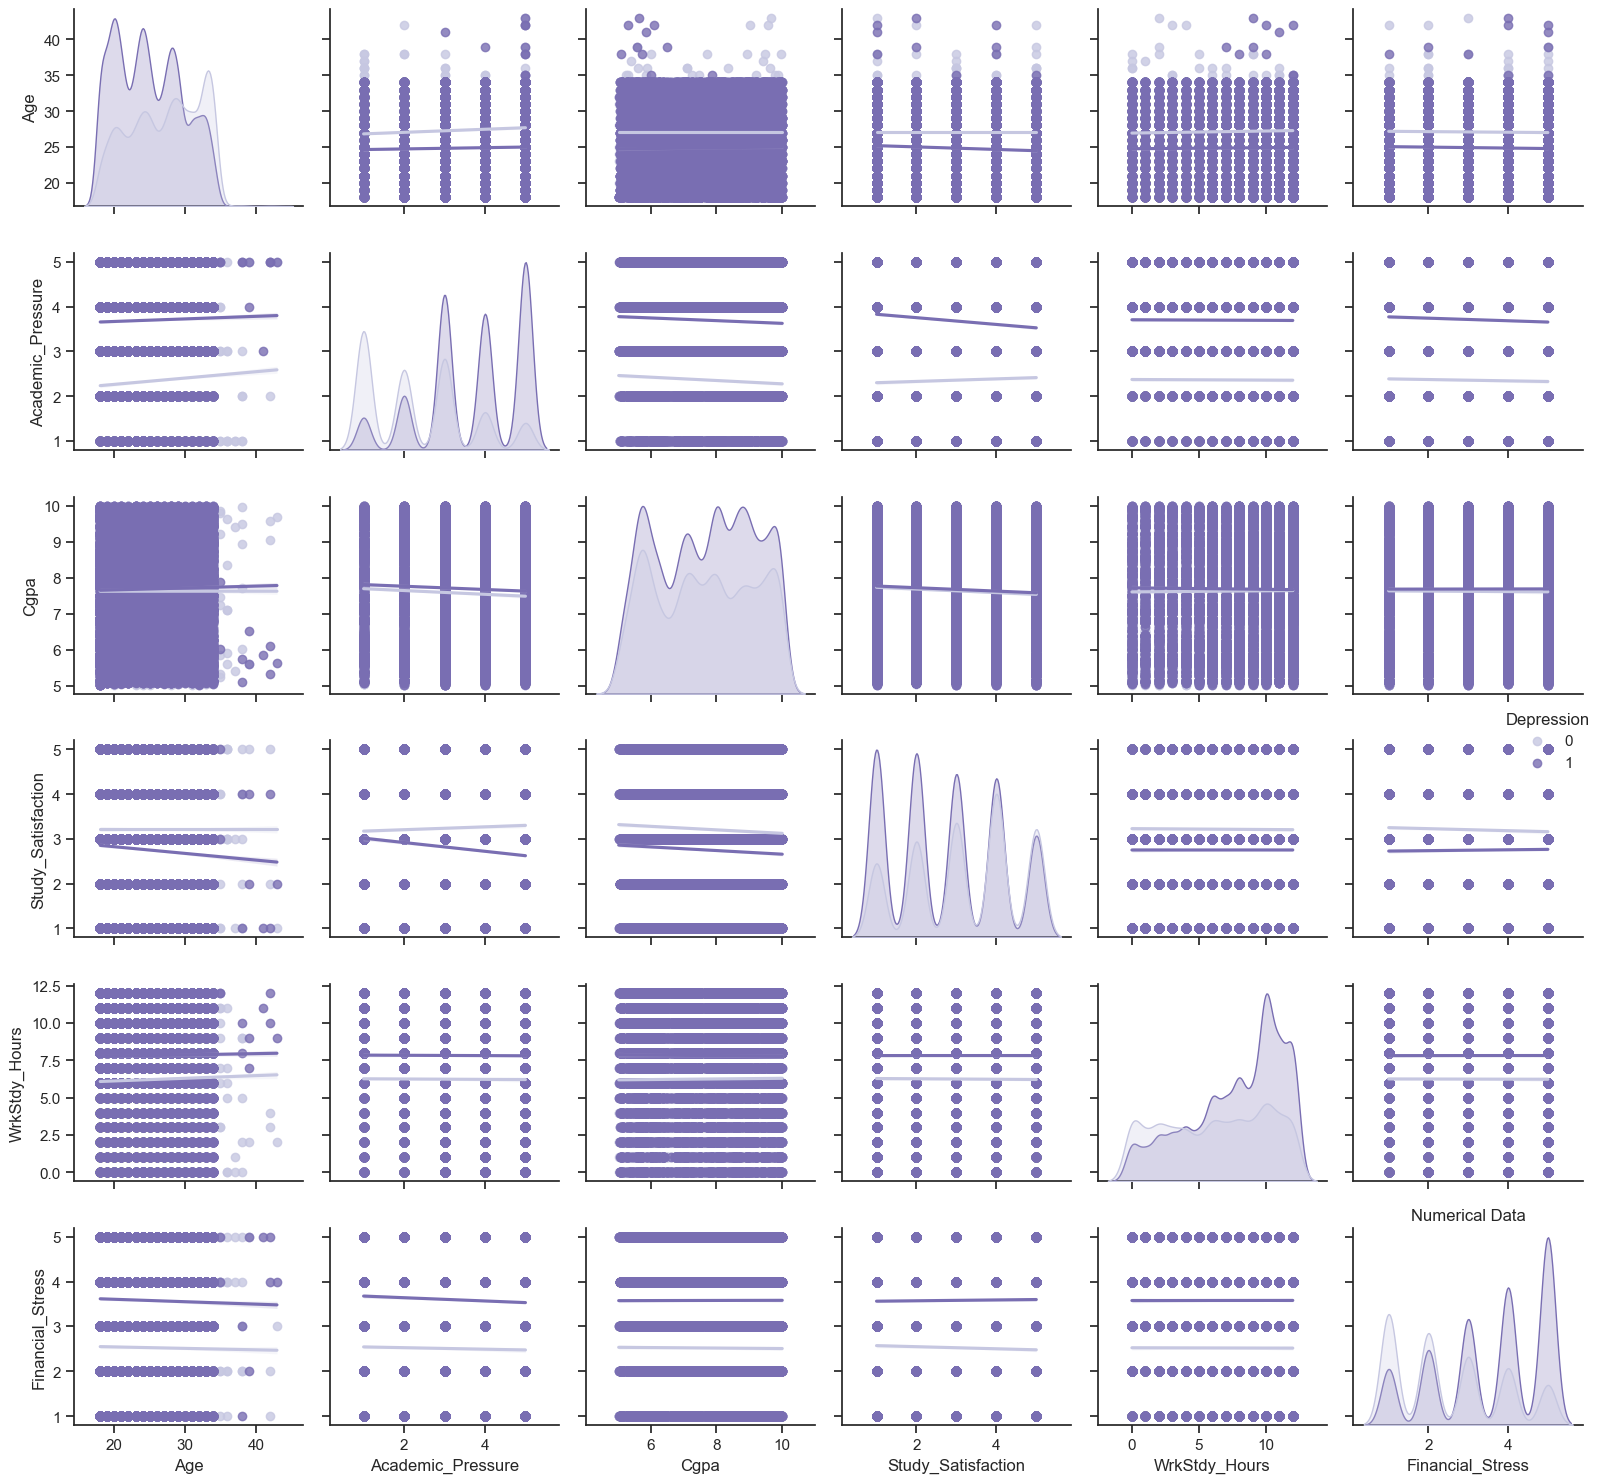

In [145]:
## pairplot --> regression.

pair_cols = data.select_dtypes(include = np.number)

plt.figure(figsize = (10, 14), facecolor = 'snow')
pairplot = sns.pairplot(pair_cols,\
                        height = 2.5,\
                        kind = "reg",\
                        diag_kind = "kde",\
                        markers = 'o',\
                        hue = 'Depression',\
                        palette = 'Purples'
)
plt.title('Numerical Data')
plt.tight_layout()
plt.show()

In [146]:
## anova test on categorical columns.

t_cols = data.select_dtypes(include = 'object').columns

for i in t_cols:
    groups = [group['Depression'].values for _, group in data.groupby(i) if len(group) > 1]

    if len(groups) > 1:  
        f_statistic, p_value = f_oneway(*groups)
        print(f"ANOVA Test for {i} - F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")
    else:
        print(f"ANOVA Test for {i} skipped due to insufficient data.")

ANOVA Test for Gender - F-statistic: 0.081, p-value: 0.776
ANOVA Test for City - F-statistic: 5.708, p-value: 0.000
ANOVA Test for Profession skipped due to insufficient data.
ANOVA Test for Sleep_Duration - F-statistic: 93.159, p-value: 0.000
ANOVA Test for Dietary_Habits - F-statistic: 629.985, p-value: 0.000
ANOVA Test for Degree - F-statistic: 20.928, p-value: 0.000
ANOVA Test for Suicidal_Thoughts - F-statistic: 11855.189, p-value: 0.000
ANOVA Test for Family_Mental_History - F-statistic: 78.943, p-value: 0.000


In [147]:
## t-test on numerical columns.

ttest_cols = data.select_dtypes(include='number').columns

for i in ttest_cols:
    group_0 = data[data['Depression'] == 0][i]
    group_1 = data[data['Depression'] == 1][i]
    
    t_stat, p_value = ttest_ind(group_0, group_1)
    
    print(f"T-test for {i} - t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")
    
    if p_value < 0.05:
        print(f"Significant difference in {i} between Depression 0 and 1\n")
    else:
        print(f"No significant difference in {i} between Depression 0 and 1\n")


T-test for Age - t-statistic: 38.755, p-value: 0.000
Significant difference in Age between Depression 0 and 1

T-test for Academic_Pressure - t-statistic: -89.968, p-value: 0.000
Significant difference in Academic_Pressure between Depression 0 and 1

T-test for Cgpa - t-statistic: -3.481, p-value: 0.001
Significant difference in Cgpa between Depression 0 and 1

T-test for Study_Satisfaction - t-statistic: 28.416, p-value: 0.000
Significant difference in Study_Satisfaction between Depression 0 and 1

T-test for WrkStdy_Hours - t-statistic: -35.648, p-value: 0.000
Significant difference in WrkStdy_Hours between Depression 0 and 1

T-test for Financial_Stress - t-statistic: -64.996, p-value: 0.000
Significant difference in Financial_Stress between Depression 0 and 1

T-test for Depression - t-statistic: -inf, p-value: 0.000
Significant difference in Depression between Depression 0 and 1



# Features Engineering

In [148]:
## categorical features encoding.

label_encode = ['Gender', 'Sleep_Duration', 'Dietary_Habits', 'Suicidal_Thoughts', 'Family_Mental_History']
le = LabelEncoder()

for i in label_encode:
    data[i] = le.fit_transform(data[i])
data.head()

Gender  Age           City Profession  Academic_Pressure  Cgpa  \
0       1   33  Visakhapatnam    Student                  5  8.97   
1       0   24      Bangalore    Student                  2  5.90   
2       1   31       Srinagar    Student                  3  7.03   
3       0   28       Varanasi    Student                  3  5.59   
4       0   25         Jaipur    Student                  4  8.13   

   Study_Satisfaction  Sleep_Duration  Dietary_Habits   Degree  \
0                   2               0               0  B.Pharm   
1                   5               0               1      BSc   
2                   5               2               0       BA   
3                   2               1               1      BCA   
4                   3               0               1   M.Tech   

   Suicidal_Thoughts  WrkStdy_Hours  Financial_Stress  Family_Mental_History  \
0                  1              3                 1                      0   
1                  0              3                 2                      1   
2                  0              9                 1                      1   
3                  1              4                 5                      1   
4                  1              1                 1                      0   

   Depression  
0           1  
1           0  
2           0  
3           1  
4           0

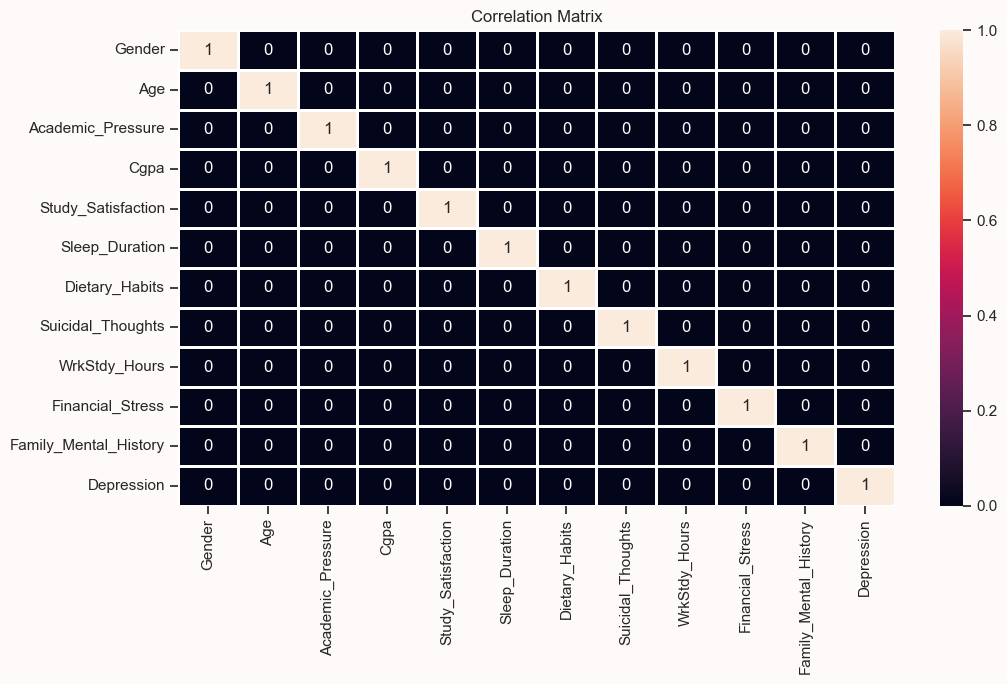

In [149]:
## correlation feature importance.

corr_mat = data.select_dtypes(include = np.number)

plt.figure(figsize = (11, 7), facecolor = 'snow')
sns.heatmap(corr_mat.corr() > 0.8,\
           annot = True,\
           cbar = True,\
           linewidths = 1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [150]:
## tabular format.

corr_mat.corr()['Depression'].to_frame().reset_index()\
.rename(columns = {'index': 'features', 'Depression': 'corr'})\
.sort_values(by = 'corr', ascending = False)

features      corr
11             Depression  1.000000
7       Suicidal_Thoughts  0.547045
2       Academic_Pressure  0.475135
9        Financial_Stress  0.363427
8           WrkStdy_Hours  0.209221
6          Dietary_Habits  0.207421
10  Family_Mental_History  0.053251
3                    Cgpa  0.020888
0                  Gender  0.001704
5          Sleep_Duration -0.022357
4      Study_Satisfaction -0.168122
1                     Age -0.226557

In [151]:
## imbalanced data.

pred = data.drop(['City', 'Profession', 'Degree', 'Depression'], axis = 1)
res = data['Depression']

smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_smote, y_smote = smote_enn.fit_resample(pred, res)

print(f'Resampled dataset shape: {y_smote.value_counts(normalize = True)}')

Resampled dataset shape: Depression
0    0.523028
1    0.476972
Name: proportion, dtype: float64


In [152]:
## dataframe.

data_2 = pd.concat([X_smote, y_smote], axis = 1)
data_2.shape

(19628, 12)

In [153]:
## data.

data_2.head()

Gender  Age  Academic_Pressure  Cgpa  Study_Satisfaction  Sleep_Duration  \
0       0   24                  2  5.90                   5               0   
1       1   31                  3  7.03                   5               2   
2       0   25                  4  8.13                   3               0   
3       1   29                  2  5.70                   3               2   
4       1   30                  3  9.54                   4               1   

   Dietary_Habits  Suicidal_Thoughts  WrkStdy_Hours  Financial_Stress  \
0               1                  0              3                 2   
1               0                  0              9                 1   
2               1                  1              1                 1   
3               0                  0              4                 1   
4               0                  0              1                 2   

   Family_Mental_History  Depression  
0                      1           0  
1                      1           0  
2                      0           0  
3                      0           0  
4                      0           0

# Feature Importance

In [154]:
## train test split.

data_feat_imp = data_2.copy(deep = True)
X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(data_feat_imp.drop('Depression', axis = 1),\
                                                    data_feat_imp['Depression'],\
                                                    test_size = 0.2,\
                                                    random_state = 42)

print(data_feat_imp.shape)
X_ftrain.shape, X_ftest.shape, y_ftrain.shape, y_ftest.shape

(19628, 12)


((15702, 11), (3926, 11), (15702,), (3926,))

In [155]:
## rf feature importance.

rf_features = RandomForestClassifier(random_state = 42)
rf_features.fit(X_ftrain, y_ftrain)

feature_imp_1 = pd.DataFrame({'features': X_ftrain.columns, 'rfimportance': rf_features.feature_importances_})\
                               .sort_values(by = 'rfimportance', ascending = False)\
                               .reset_index(drop = 'first')

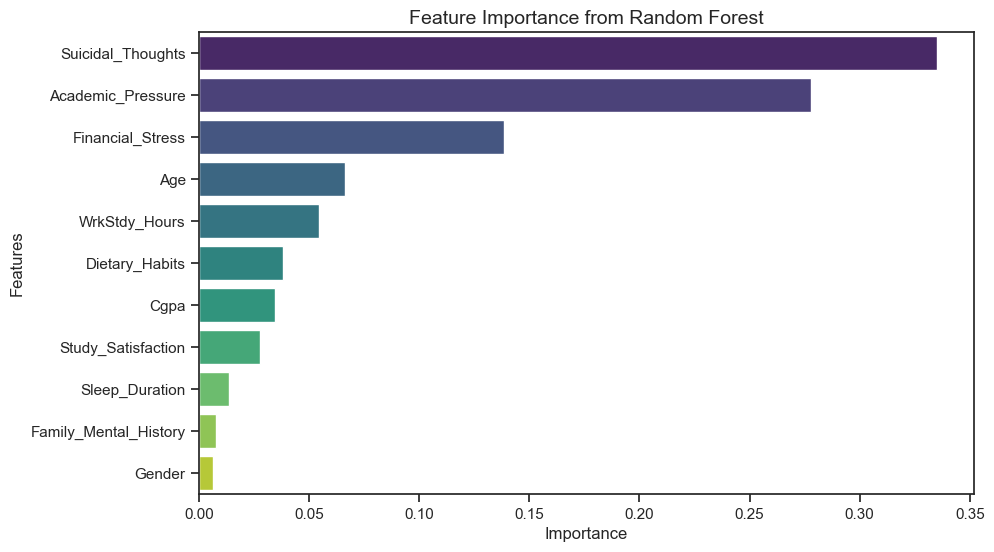

In [156]:
## plot.

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'rfimportance', 
    y = 'features', 
    data = feature_imp_1, 
    palette = 'viridis'
)

plt.title("Feature Importance from Random Forest", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [157]:
## gb feature importance.

gb_features = GradientBoostingClassifier(random_state = 42)
gb_features.fit(X_ftrain, y_ftrain)

feature_imp_2 = pd.DataFrame({'features': X_ftrain.columns, 'gbimportance': gb_features.feature_importances_})\
                               .sort_values(by = 'gbimportance', ascending = False)\
                               .reset_index(drop = 'first')

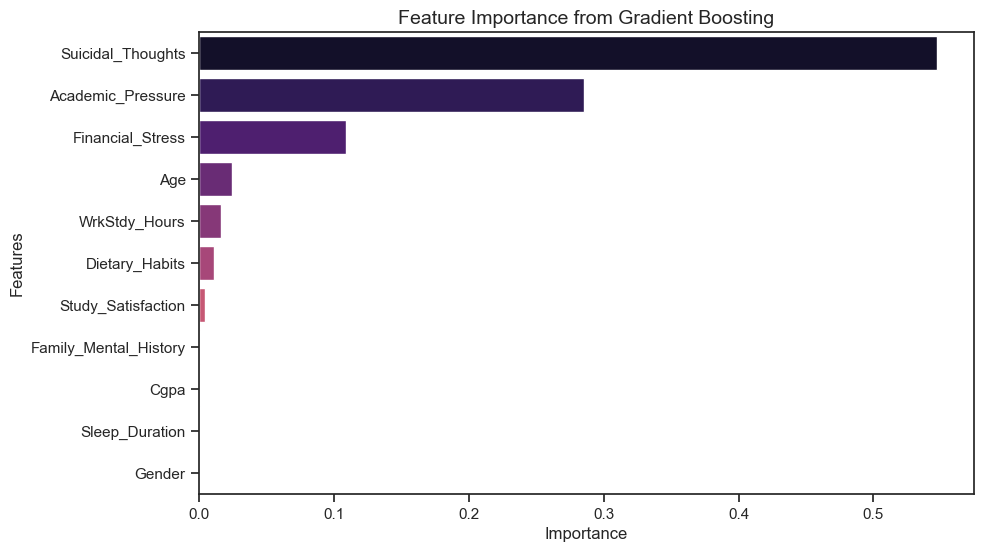

In [158]:
## plot.

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'gbimportance', 
    y = 'features', 
    data = feature_imp_2, 
    palette = 'magma'
)

plt.title("Feature Importance from Gradient Boosting", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [159]:
## adb feature importance.

ab_features = AdaBoostClassifier(random_state = 42)
ab_features.fit(X_ftrain, y_ftrain)

feature_imp_3 = pd.DataFrame({'features': X_ftrain.columns, 'abimportance': ab_features.feature_importances_})\
                               .sort_values(by = 'abimportance', ascending = False)\
                               .reset_index(drop = 'first')

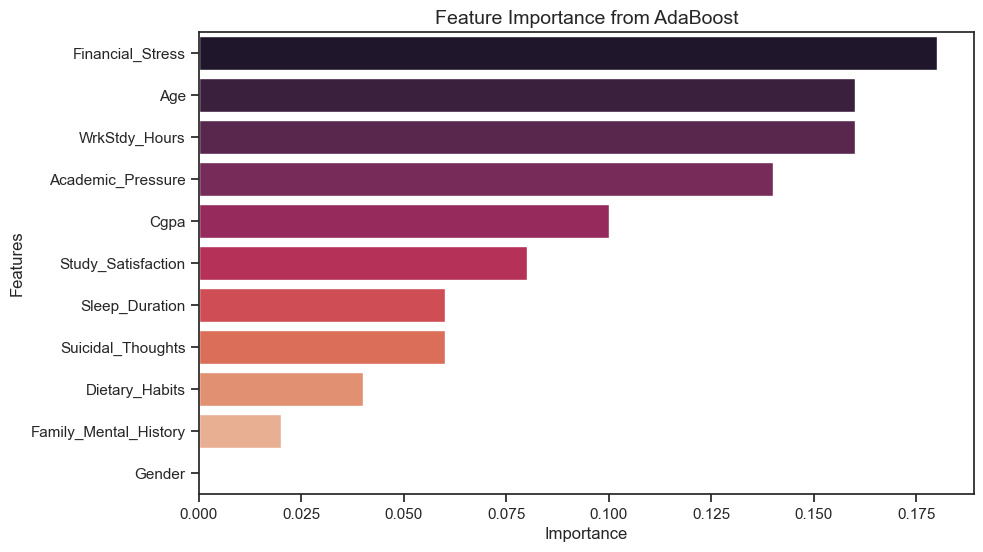

In [160]:
## plot.

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'abimportance', 
    y = 'features', 
    data = feature_imp_3, 
    palette = 'rocket'
)

plt.title("Feature Importance from AdaBoost", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [161]:
## mutual info classif feature importance.

mi_scores = mutual_info_classif(X_ftrain, y_ftrain)

feature_imp_4 = pd.DataFrame({'features': X_ftrain.columns, 'importance': mi_scores})\
                               .sort_values(by = 'importance', ascending = False)
mi_scores

array([0.00379487, 0.06779739, 0.30306355, 0.10470402, 0.03670646,
       0.0035415 , 0.06076269, 0.2819199 , 0.06750668, 0.1712593 ,
       0.00846027])

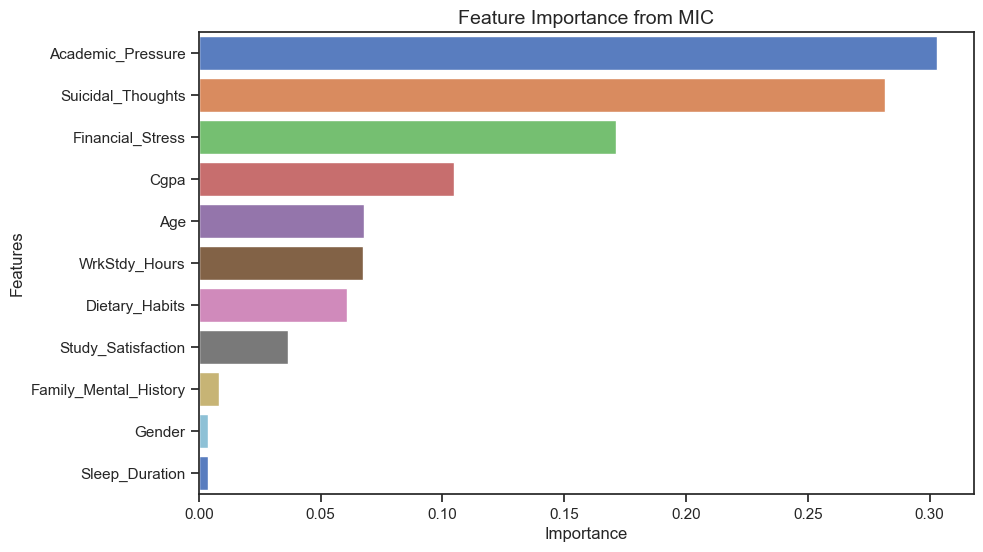

In [162]:
## plot.

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'importance', 
    y = 'features', 
    data = feature_imp_4, 
    palette = 'muted'
)

plt.title("Feature Importance from MIC", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

# Modelling

In [163]:
## train_test_split.

predictors = data_2.drop(['Depression', 'Gender', 'Sleep_Duration', 'Family_Mental_History'], axis = 1)
response = data_2['Depression']

X_train, X_test, y_train, y_test = train_test_split(predictors,\
                                                    response,\
                                                    train_size = 0.8,\
                                                    test_size = 0.2,\
                                                    random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15702, 8), (3926, 8), (15702,), (3926,))

In [164]:
## scale the data.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [165]:
## knn model

train_scores = []
test_scores = []

for i in range(1, 40, 2):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    train_pred = knn_model.predict(X_train)
    test_pred = knn_model.predict(X_test)
    tr_score = accuracy_score(y_train, train_pred)
    ts_score = accuracy_score(y_test, test_pred)
    train_scores.append(tr_score)
    test_scores.append(ts_score)

In [166]:
## scores.

print('Training Accuracy', np.max(tr_score))
print('Testing Accuracy', np.max(ts_score))

Training Accuracy 0.9611514456757101
Testing Accuracy 0.9628120224146715


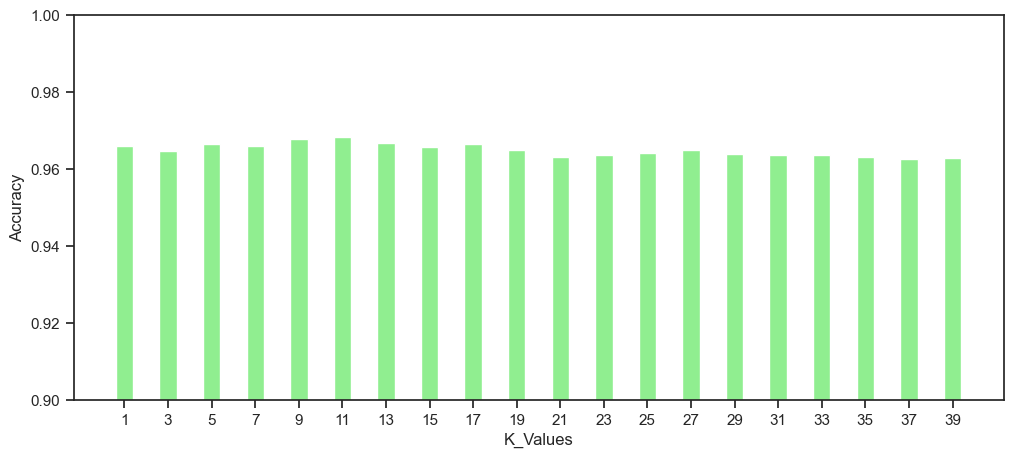

In [167]:
## plot.

plt.figure(figsize = (12, 5))

plt.bar(range(1, 40, 2), test_scores,\
        color = 'lightgreen')
plt.xlabel('K_Values')
plt.ylabel('Accuracy')
plt.xticks(range(1, 40, 2))
plt.ylim(0.9, 1.0)
plt.show()

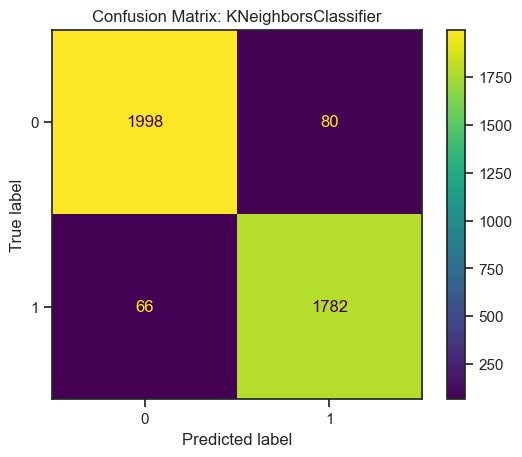

In [168]:
## plot confusion matix for knn.

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_model.classes_)
disp.plot(cmap = 'viridis', values_format = 'd')
plt.title(f'Confusion Matrix: {knn_model.__class__.__name__}')
plt.show()

In [169]:
## cross validation score knn.

knn_cv = cross_val_score(estimator = knn_model,\
                         X = X_train,\
                         y = y_train,\
                         scoring = 'accuracy',\
                         n_jobs = -1,\
                         cv = 5)
print(f'CV Mean of KNN: {knn_cv.mean()}')

CV Mean of KNN: 0.9591771860558019


In [170]:
## classification report.

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2078
           1       0.96      0.96      0.96      1848

    accuracy                           0.96      3926
   macro avg       0.96      0.96      0.96      3926
weighted avg       0.96      0.96      0.96      3926



In [171]:
## naive bayes.

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

pred_train = nb_model.predict(X_train)
pred_test = nb_model.predict(X_test)

print('Training Accuracy', accuracy_score(y_train, pred_train))
print('Testing Accuracy', accuracy_score(y_test, pred_test))
print()
print(classification_report(y_test, pred_test))

Training Accuracy 0.9522353840275124
Testing Accuracy 0.9533876719307183

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2078
           1       0.95      0.95      0.95      1848

    accuracy                           0.95      3926
   macro avg       0.95      0.95      0.95      3926
weighted avg       0.95      0.95      0.95      3926



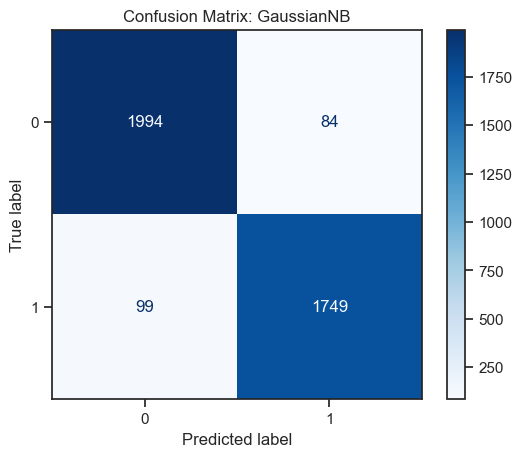

In [172]:
## confusion matrix for naive bayes.

cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb_model.classes_)
disp.plot(cmap = 'Blues', values_format = 'd')
plt.title(f'Confusion Matrix: {nb_model.__class__.__name__}')
plt.show()

In [173]:
## cross validation score naive bayes.

nb_cv = cross_val_score(estimator = nb_model,\
                        X = X_train,\
                        y = y_train,\
                        scoring = 'accuracy',\
                        n_jobs = -1,\
                        cv = 5)
print(f'CV Mean of NB: {nb_cv.mean()}')

CV Mean of NB: 0.9515350703759807


In [174]:
## svc.

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernels:
    svc_model = SVC(kernel = i, random_state = 42)
    svc_model.fit(X_train, y_train)

    pred_train = svc_model.predict(X_train)
    pred_test = svc_model.predict(X_test)

    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)

    print(f'Training Accuracy with {i} kernel: {accuracy_train:.4f}')
    print(f'Testing Accuracy with {i} kernel: {accuracy_test:.4f}\n')

Training Accuracy with linear kernel: 0.9660
Testing Accuracy with linear kernel: 0.9651

Training Accuracy with poly kernel: 0.9685
Testing Accuracy with poly kernel: 0.9636

Training Accuracy with rbf kernel: 0.9706
Testing Accuracy with rbf kernel: 0.9671

Training Accuracy with sigmoid kernel: 0.9436
Testing Accuracy with sigmoid kernel: 0.9447



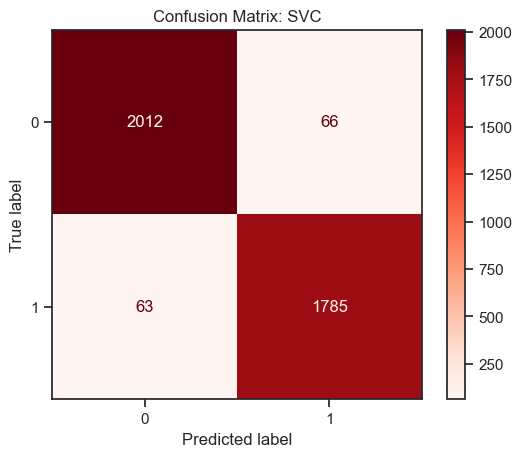

In [175]:
## confusion matrix for svc.

svc_model = SVC(kernel = 'rbf', random_state = 42)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc_model.classes_)
disp.plot(cmap = 'Reds', values_format = 'd')
plt.title(f'Confusion Matrix: {svc_model.__class__.__name__}')
plt.show()

In [176]:
## cross validation score svc.

svc_cv = cross_val_score(estimator = svc_model,\
                         X = X_train,\
                         cv = 5,\
                         y = y_train,\
                         scoring = 'accuracy',\
                         n_jobs = -1)
print(f'CV Mean of SVC: {svc_cv.mean()}')

CV Mean of SVC: 0.9670105062082139


In [177]:
## classification report.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2078
           1       0.96      0.97      0.97      1848

    accuracy                           0.97      3926
   macro avg       0.97      0.97      0.97      3926
weighted avg       0.97      0.97      0.97      3926



In [178]:
## load the models.

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),\
          GradientBoostingClassifier(), XGBClassifier(), LGBMClassifier()]

models 1:- LogisticRegression
Training Accuracy: 0.9661826518914788
Testing Accuracy: 0.9653591441670912
Training Recall: 0.9679265371306894
Testing Recall: 0.9621212121212122
Training Precision: 0.9616554277403147
Testing Precision: 0.9642082429501084
Training F1score: 0.964780791934735
Testing F1score: 0.9631635969664138
Cross Validation Mean:  0.9664372578005705



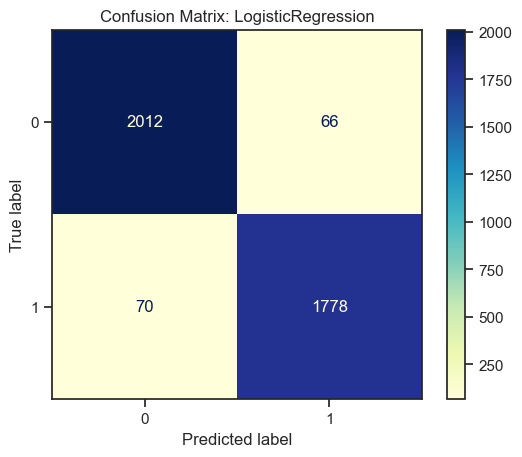

------------------------------------------------------------
models 2:- DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9513499745287824
Training Recall: 1.0
Testing Recall: 0.9377705627705628
Training Precision: 1.0
Testing Precision: 0.9579878385848535
Training F1score: 1.0
Testing F1score: 0.9477713973202079
Cross Validation Mean:  0.9521081362785594



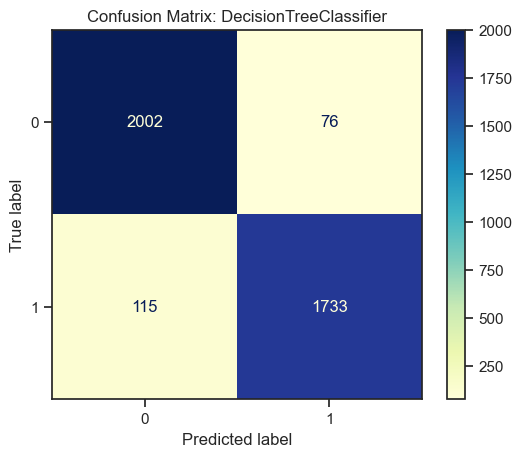

------------------------------------------------------------
models 3:- RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9686704024452368
Training Recall: 1.0
Testing Recall: 0.961038961038961
Training Precision: 1.0
Testing Precision: 0.9720853858784894
Training F1score: 1.0
Testing F1score: 0.966530612244898
Cross Validation Mean:  0.9701946720688166



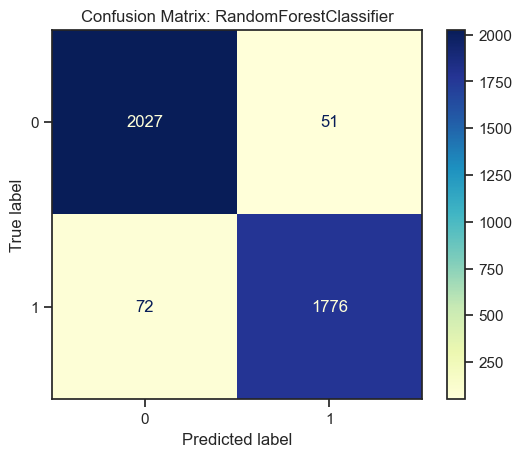

------------------------------------------------------------
models 4:- AdaBoostClassifier
Training Accuracy: 0.965736848809069
Testing Accuracy: 0.9651044319918493
Training Recall: 0.9653979238754326
Testing Recall: 0.9621212121212122
Training Precision: 0.9630908125331917
Testing Precision: 0.9636856368563685
Training F1score: 0.9642429881696132
Testing F1score: 0.9629027890603845
Cross Validation Mean:  0.9646542238769348



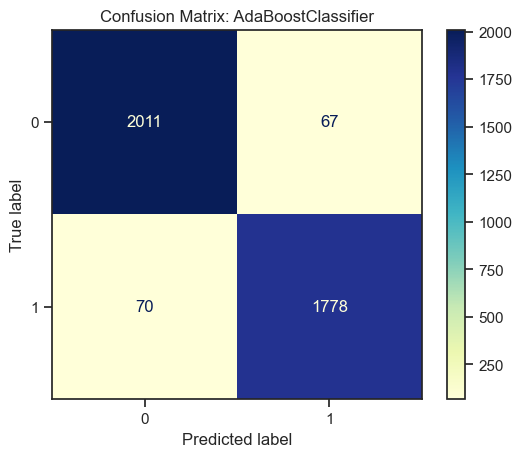

------------------------------------------------------------
models 5:- GradientBoostingClassifier
Training Accuracy: 0.9686027257674181
Testing Accuracy: 0.9658685685175752
Training Recall: 0.9691243013042321
Testing Recall: 0.9637445887445888
Training Precision: 0.96539838260639
Testing Precision: 0.9637445887445888
Training F1score: 0.9672577538686326
Testing F1score: 0.9637445887445888
Cross Validation Mean:  0.964781673246988



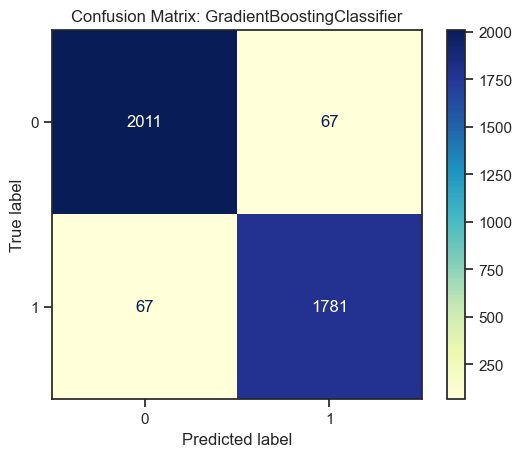

------------------------------------------------------------
models 6:- XGBClassifier
Training Accuracy: 0.9978983568972105
Testing Accuracy: 0.9663779928680591
Training Recall: 0.9990684056428001
Testing Recall: 0.95995670995671
Training Precision: 0.9965485198460109
Testing Precision: 0.9683406113537117
Training F1score: 0.997806871801688
Testing F1score: 0.9641304347826087
Cross Validation Mean:  0.969430766703776



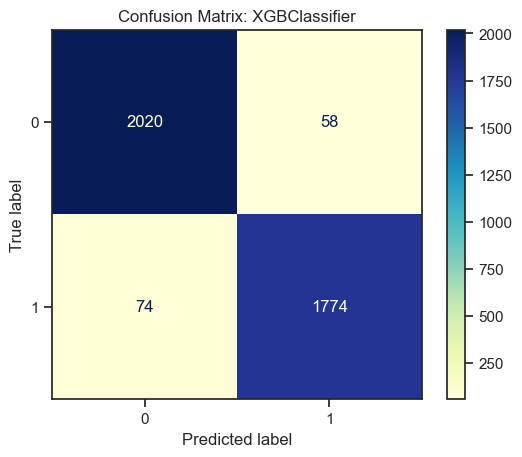

------------------------------------------------------------
models 7:- LGBMClassifier
[LightGBM] [Info] Number of positive: 7514, number of negative: 8188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 15702, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478538 -> initscore=-0.085902
[LightGBM] [Info] Start training from score -0.085902
Training Accuracy: 0.9848426951980639
Testing Accuracy: 0.9671421293937851
Training Recall: 0.9873569337237157
Testing Recall: 0.9637445887445888
Training Precision: 0.9810896588204179
Testing Precision: 0.9663591969614759
Training F1score: 0.9842133191828071
Testing F1score: 0.9650501219181794
Cross Validation Mean:  0.9682841482184463



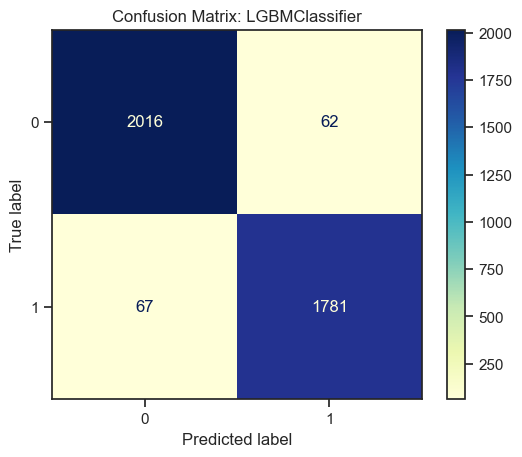

------------------------------------------------------------


In [179]:
## models train & evaluate.

for n, model in enumerate(models):
    print(f'models {n + 1}:- {model.__class__.__name__}')
    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    print(f'Training Accuracy: {accuracy_score(y_train, pred_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, pred_test)}')
    print(f'Training Recall: {recall_score(y_train, pred_train)}')
    print(f'Testing Recall: {recall_score(y_test, pred_test)}')
    print(f'Training Precision: {precision_score(y_train, pred_train)}')
    print(f'Testing Precision: {precision_score(y_test, pred_test)}')
    print(f'Training F1score: {f1_score(y_train, pred_train)}')
    print(f'Testing F1score: {f1_score(y_test, pred_test)}')

    cross_validation_scores = cross_val_score(estimator = model,\
                                              X = X_train,\
                                              y = y_train,\
                                              scoring = 'accuracy',\
                                              n_jobs = -1,\
                                              cv = 5
                                              )
    print('Cross Validation Mean: ', cross_validation_scores.mean())
    print()

    cm = confusion_matrix(y_test, pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot(cmap = 'YlGnBu', values_format = 'd')
    plt.title(f'Confusion Matrix: {model.__class__.__name__}')
    plt.show()
    print('-' * 60)

# Hyperparameter Tuning.

#### - XGBoost, LightGBM, Random Forest, SVC, Decision Tree, Gradient Boosting

In [180]:
## xgboost tuning.

xgb_param_grid = {
    'n_estimators': [100, 200, 300],\
    'learning_rate': [0.01, 0.1, 0.2],\
    'max_depth': [3, 5, 7],\
    'min_child_weight': [1, 3, 5],\
    'subsample': [0.8, 1.0],\
    'colsample_bytree': [0.8, 1.0],\
}

xgb = XGBClassifier()

xgb_rscv = RandomizedSearchCV(estimator = xgb,\
                              param_distributions = xgb_param_grid,\
                              n_iter =  20,\
                              scoring = 'accuracy',\
                              cv = 5,\
                              verbose = 2,\
                              random_state = 42,\
                              n_jobs = -1
                             )

xgb_rscv.fit(X_train, y_train)

print(f'Best Params of XGB: {xgb_rscv.best_params_}')
print(f'Best Score of XGB: {xgb_rscv.best_score_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params of XGB: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score of XGB: 0.9691122548095153


In [181]:
## lightgbm tuning.

lgb_param_grid = {
    'n_estimators': [100, 200, 300],\
    'learning_rate': [0.01, 0.1, 0.2],\
    'max_depth': [3, 5, 7],\
    'num_leaves': [31, 63, 127],\
    'min_child_samples': [10, 20, 30],\
    'subsample': [0.8, 1.0],\
}


lgb = LGBMClassifier()

lgb_rscv = RandomizedSearchCV(estimator = lgb,\
                              param_distributions = lgb_param_grid,\
                              n_iter =  20,\
                              scoring = 'accuracy',\
                              cv = 5,\
                              verbose = 2,\
                              random_state = 42,\
                              n_jobs = -1
                             )

lgb_rscv.fit(X_train, y_train)

print(f'Best Params of LGB: {lgb_rscv.best_params_}')
print(f'Best Score of LGB: {lgb_rscv.best_score_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 7514, number of negative: 8188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 15702, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478538 -> initscore=-0.085902
[LightGBM] [Info] Start training from score -0.085902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Params of LGB: {'subsample': 1.0, 'num_leaves': 63, 'n_estimators': 300, 'min_c

In [182]:
## random forest tuning.

rf_param_grid = {
    'n_estimators': [100, 200, 300],\
    'max_depth': [None, 10, 20],\
    'min_samples_split': [2, 5, 10],\
    'min_samples_leaf': [1, 2, 4],\
    'max_features': ['sqrt', 'log2']
}


rf = RandomForestClassifier()

rf_rscv = RandomizedSearchCV(estimator = rf,\
                              param_distributions = rf_param_grid,\
                              n_iter =  20,\
                              scoring = 'accuracy',\
                              cv = 5,\
                              verbose = 2,\
                              random_state = 42,\
                              n_jobs = -1
                             )

rf_rscv.fit(X_train, y_train)

print(f'Best Params of RF: {rf_rscv.best_params_}')
print(f'Best Score of RF: {rf_rscv.best_score_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params of RF: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Score of RF: 0.9698763832363013


In [183]:
## svc tuning.

svc_param_grid = {
    'C': [0.1, 1, 10],\
    'kernel': ['linear', 'rbf', 'poly'],\
    'gamma': ['scale', 'auto'], \
    'degree': [2, 3, 4],
}

svc = SVC()

svc_rscv = RandomizedSearchCV(estimator = svc,\
                              param_distributions = svc_param_grid,\
                              n_iter =  20,\
                              scoring = 'accuracy',\
                              cv = 10,\
                              verbose = 2,\
                              random_state = 42,\
                              n_jobs = -1
                             )

svc_rscv.fit(X_train, y_train)

print(f'Best Params of SVC: {svc_rscv.best_params_}')
print(f'Best Score of SVC: {svc_rscv.best_score_}')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Params of SVC: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 1}
Best Score of SVC: 0.9673287735103203


In [184]:
## decision tree tuning.

dt_param_grid = {
    'max_depth': [None, 10, 20],\
    'min_samples_split': [2, 5, 10],\
    'min_samples_leaf': [1, 2, 4],\
    'criterion': ['gini', 'entropy']
}


dt = DecisionTreeClassifier()

dt_rscv = RandomizedSearchCV(estimator = dt,\
                              param_distributions = dt_param_grid,\
                              n_iter =  20,\
                              scoring = 'accuracy',\
                              cv = 5,\
                              verbose = 2,\
                              random_state = 42,\
                              n_jobs = -1
                             )

dt_rscv.fit(X_train, y_train)

print(f'Best Params of DT: {dt_rscv.best_params_}')
print(f'Best Score of DT: {dt_rscv.best_score_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params of DT: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy'}
Best Score of DT: 0.9527449167269946


In [185]:
## gradient boosting tuning.

gb_param_grid = {
    'n_estimators': [100, 200, 300],\
    'learning_rate': [0.01, 0.1, 0.2],\
    'max_depth': [3, 5, 7],\
    'min_samples_split': [2, 5, 10],\
    'min_samples_leaf': [1, 2, 4],\
    'subsample': [0.8, 1.0]
}


gb = GradientBoostingClassifier()

gb_rscv = RandomizedSearchCV(estimator = gb,\
                              param_distributions = gb_param_grid,\
                              n_iter =  20,\
                              scoring = 'accuracy',\
                              cv = 5,\
                              verbose = 2,\
                              random_state = 42,\
                              n_jobs = -1
                             )

gb_rscv.fit(X_train, y_train)

print(f'Best Params of GB: {gb_rscv.best_params_}')
print(f'Best Score of GB: {gb_rscv.best_score_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params of GB: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.2}
Best Score of GB: 0.9701311603063651


In [186]:
## best models after tune.

best_svc = svc_rscv.best_estimator_
best_gb = gb_rscv.best_estimator_
best_lgb = lgb_rscv.best_estimator_
best_rf = rf_rscv.best_estimator_
best_xgb = xgb_rscv.best_estimator_

model SVC:

Training Accuracy: 0.9706406827155777
Testing Accuracy: 0.9671421293937851
Training Recall: 0.9748469523556029
Testing Recall: 0.9659090909090909
Training Precision: 0.9641963933131499
Testing Precision: 0.9643435980551054
Training F1score: 0.9694924227384025
Testing F1score: 0.9651257096512571
Cross Validation Mean:  0.9670105062082139



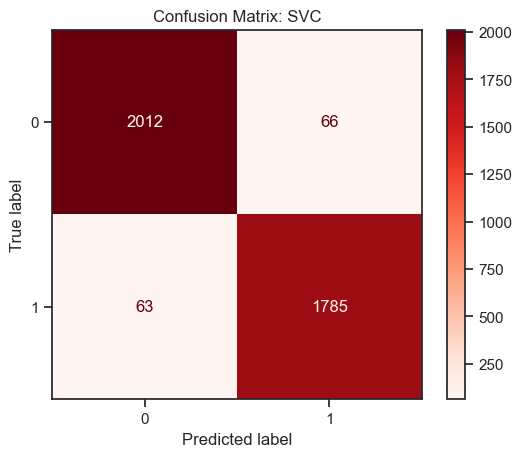

------------------------------------------------------------
model XGB:

Training Accuracy: 0.9879633167749331
Testing Accuracy: 0.9691798267957208
Training Recall: 0.9896193771626297
Testing Recall: 0.9653679653679653
Training Precision: 0.9852921690738041
Testing Precision: 0.9690385659967409
Training F1score: 0.9874510324679636
Testing F1score: 0.9671997831390621
Cross Validation Mean:  0.9691122548095153



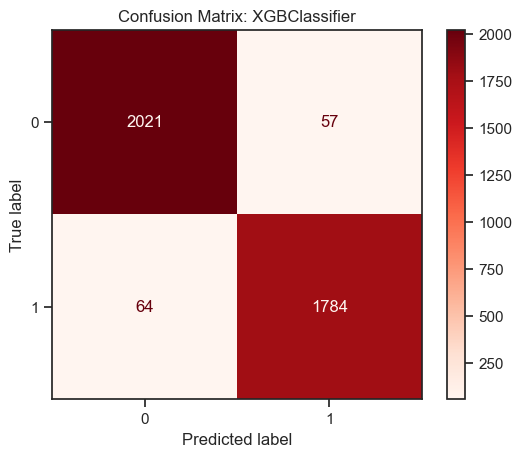

------------------------------------------------------------


In [187]:
## tune models.

tune_models = {'SVC': best_svc,\
               #'GB': best_gb,\
               #'LGB': best_lgb,\
               #'RF': best_rf,\
               'XGB': best_xgb
              }

for name, model in tune_models.items():
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    print(f'model {name}:\n')
    print(f'Training Accuracy: {accuracy_score(y_train, pred_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, pred_test)}')
    print(f'Training Recall: {recall_score(y_train, pred_train)}')
    print(f'Testing Recall: {recall_score(y_test, pred_test)}')
    print(f'Training Precision: {precision_score(y_train, pred_train)}')
    print(f'Testing Precision: {precision_score(y_test, pred_test)}')
    print(f'Training F1score: {f1_score(y_train, pred_train)}')
    print(f'Testing F1score: {f1_score(y_test, pred_test)}')

    cross_validation_scores = cross_val_score(estimator = model,\
                                              X = X_train,\
                                              y = y_train,\
                                              scoring = 'accuracy',\
                                              n_jobs = -1,\
                                              cv = 5
                                              )
    print('Cross Validation Mean: ', cross_validation_scores.mean())
    print()

    cm = confusion_matrix(y_test, pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot(cmap = 'Reds', values_format = 'd')
    plt.title(f'Confusion Matrix: {model.__class__.__name__}')
    plt.show()
    print('-' * 60)

# Deployment

In [188]:
## joblib for export.

svc_model_ = jb.dump(best_svc, '_svc_model_')
xgb_model_ = jb.dump(best_xgb, '_xgb_model_')

In [189]:
jb.load('_svc_model_'), jb.load('_xgb_model_')

(SVC(C=1, degree=2),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=5, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...))